## Investigation On Intervals and Determine whether it's meal

In [1]:
import meals as ml
import tools as tl
import intervals as invs

import paths
from preprocessing import read_excel_by_sheet

path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

In [2]:
ctrl_pellet_avg = [] # store control group average pellet in an hour
cask_pellet_avg = [] # same for cask group
fr1_ctrl_meal_count = [] # store daily average meal for control group
fr1_cask_meal_count = [] # store daily average meal for cask group

## Control Group

### Bhv 3

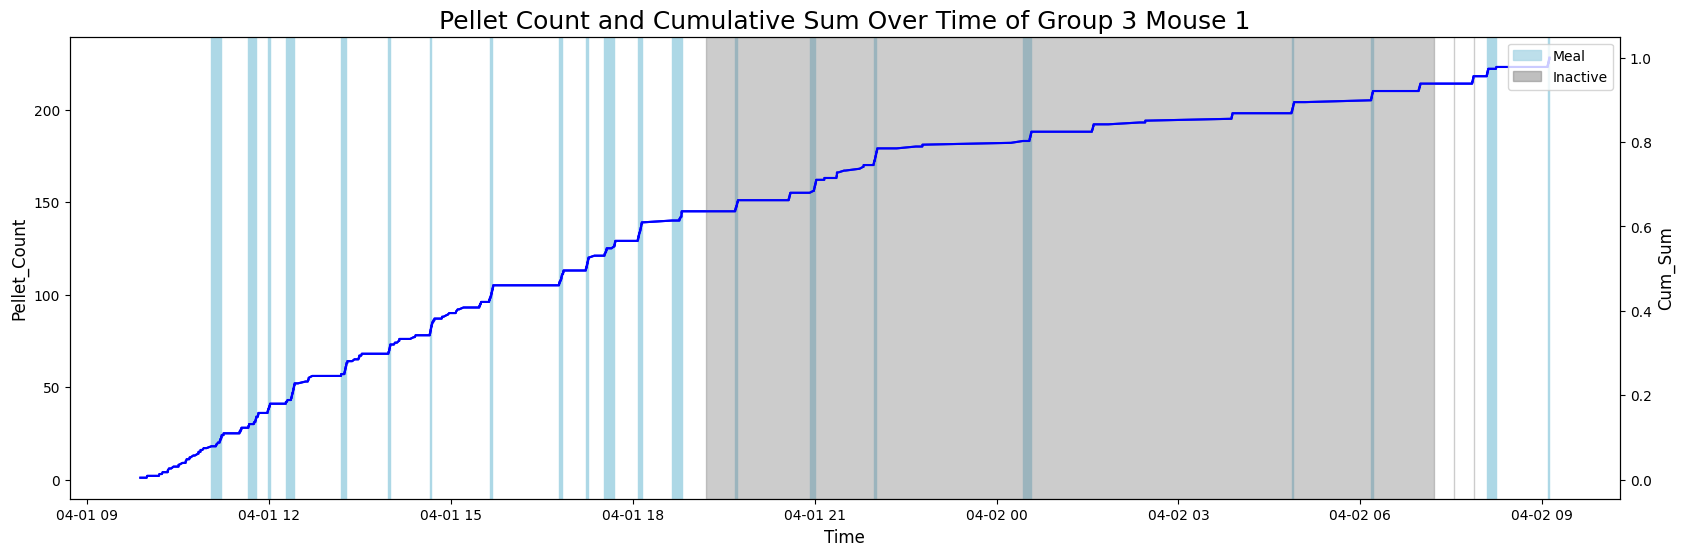

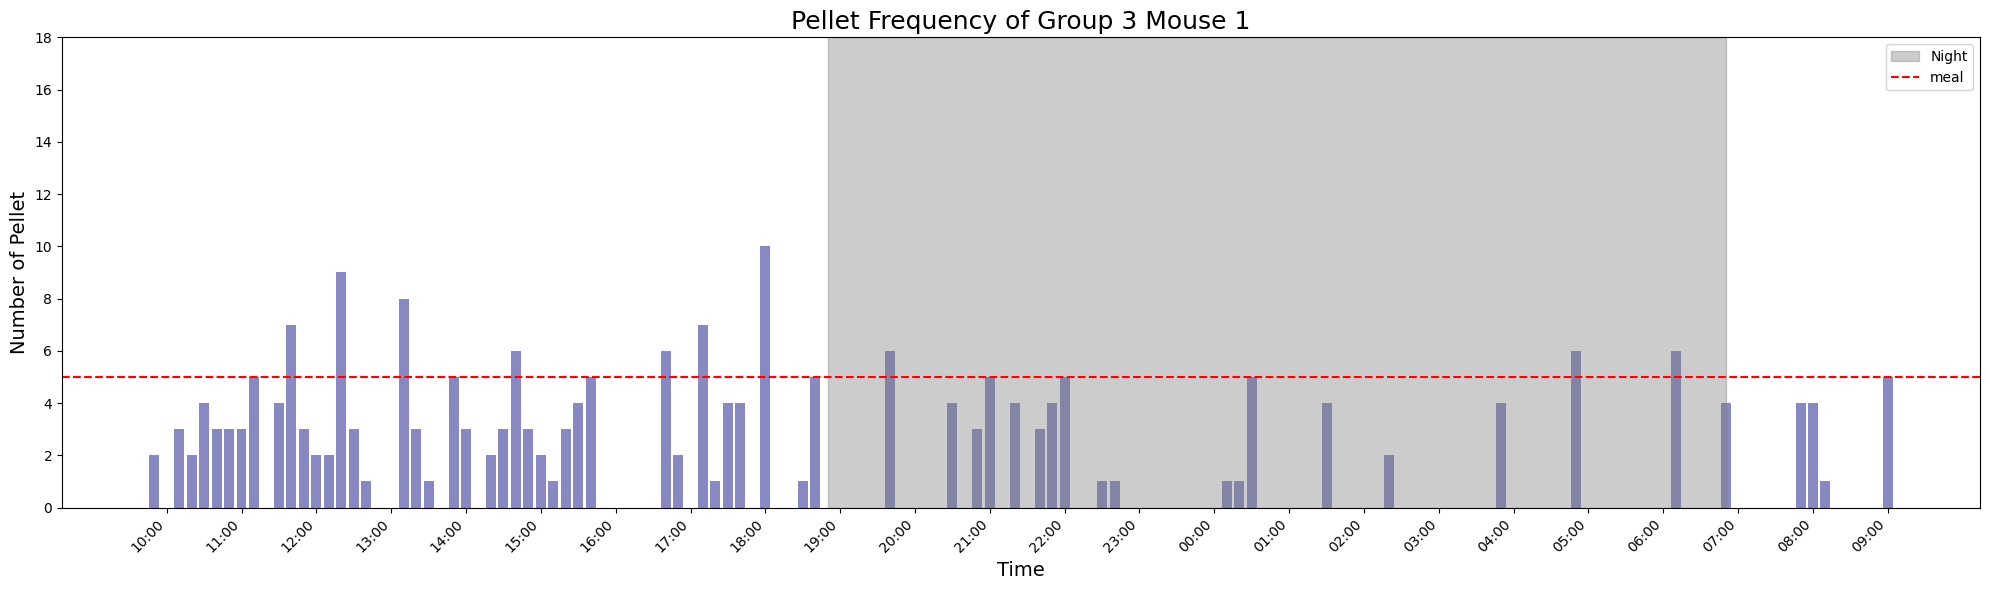

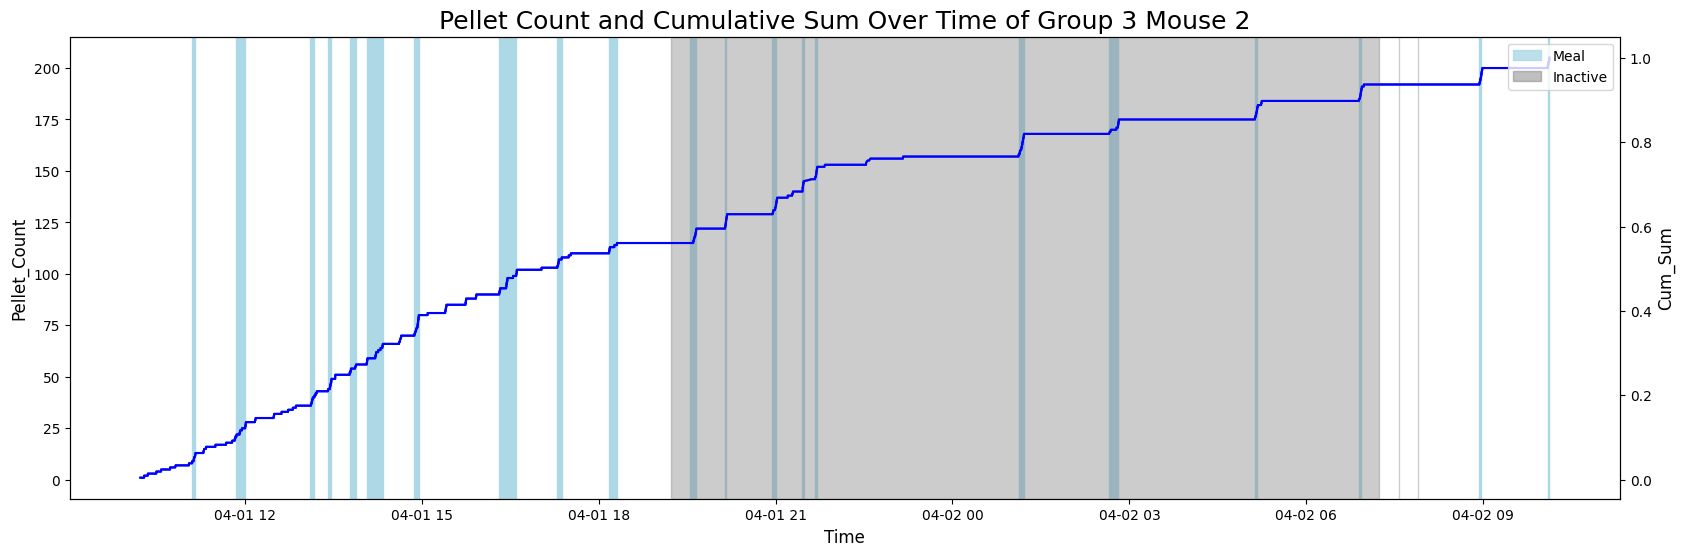

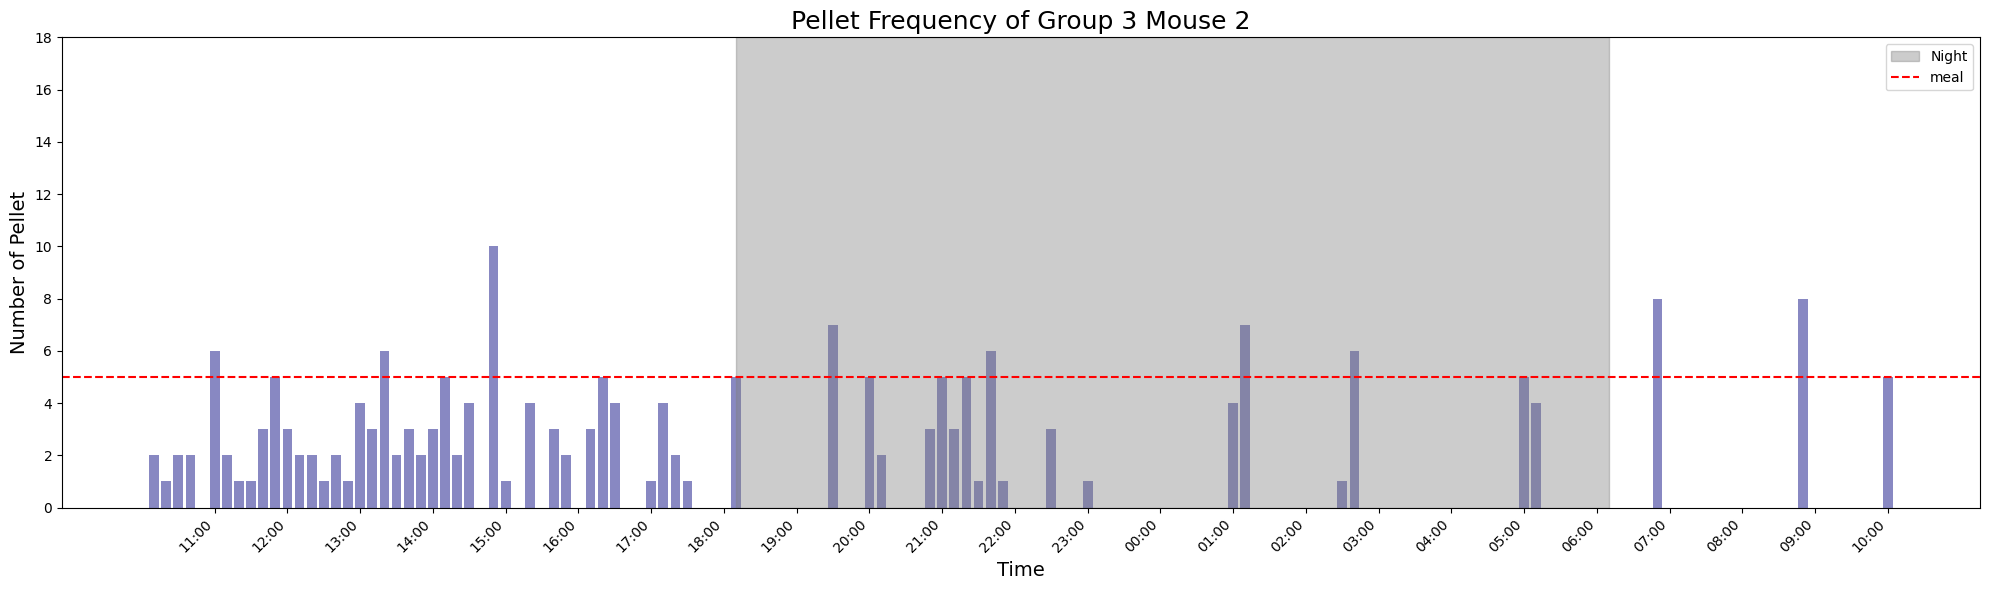

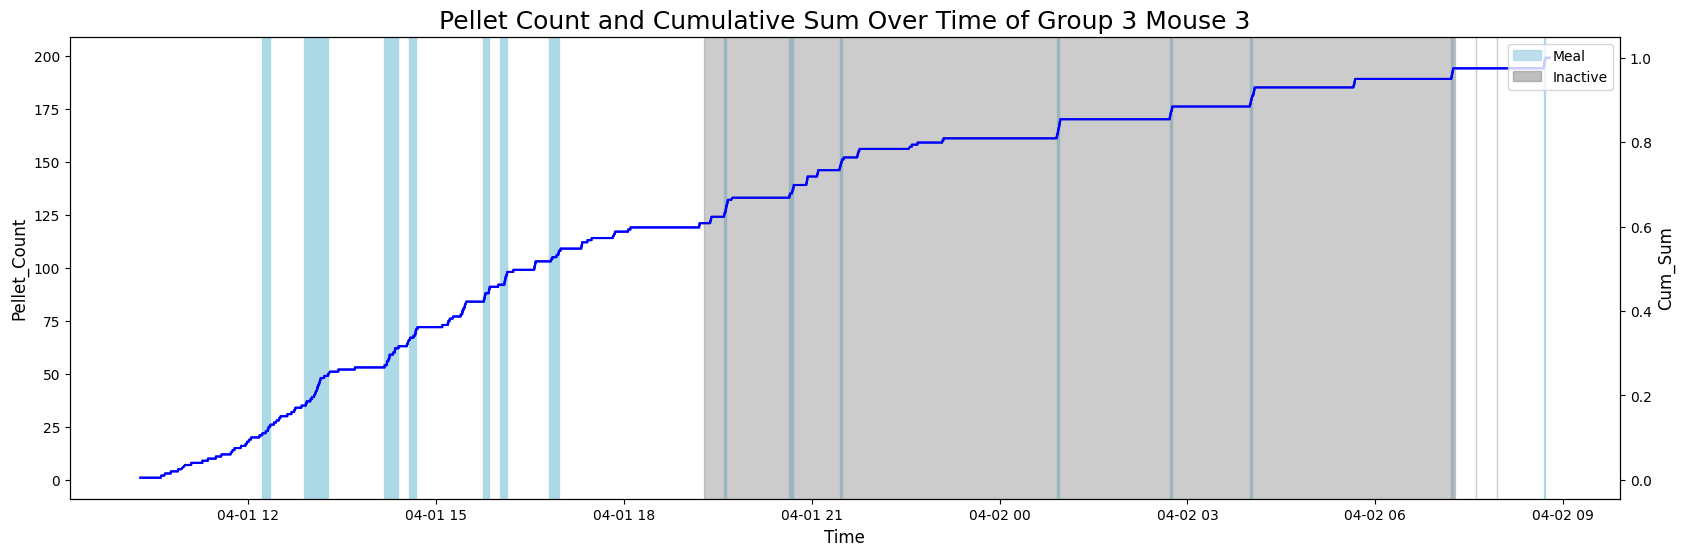

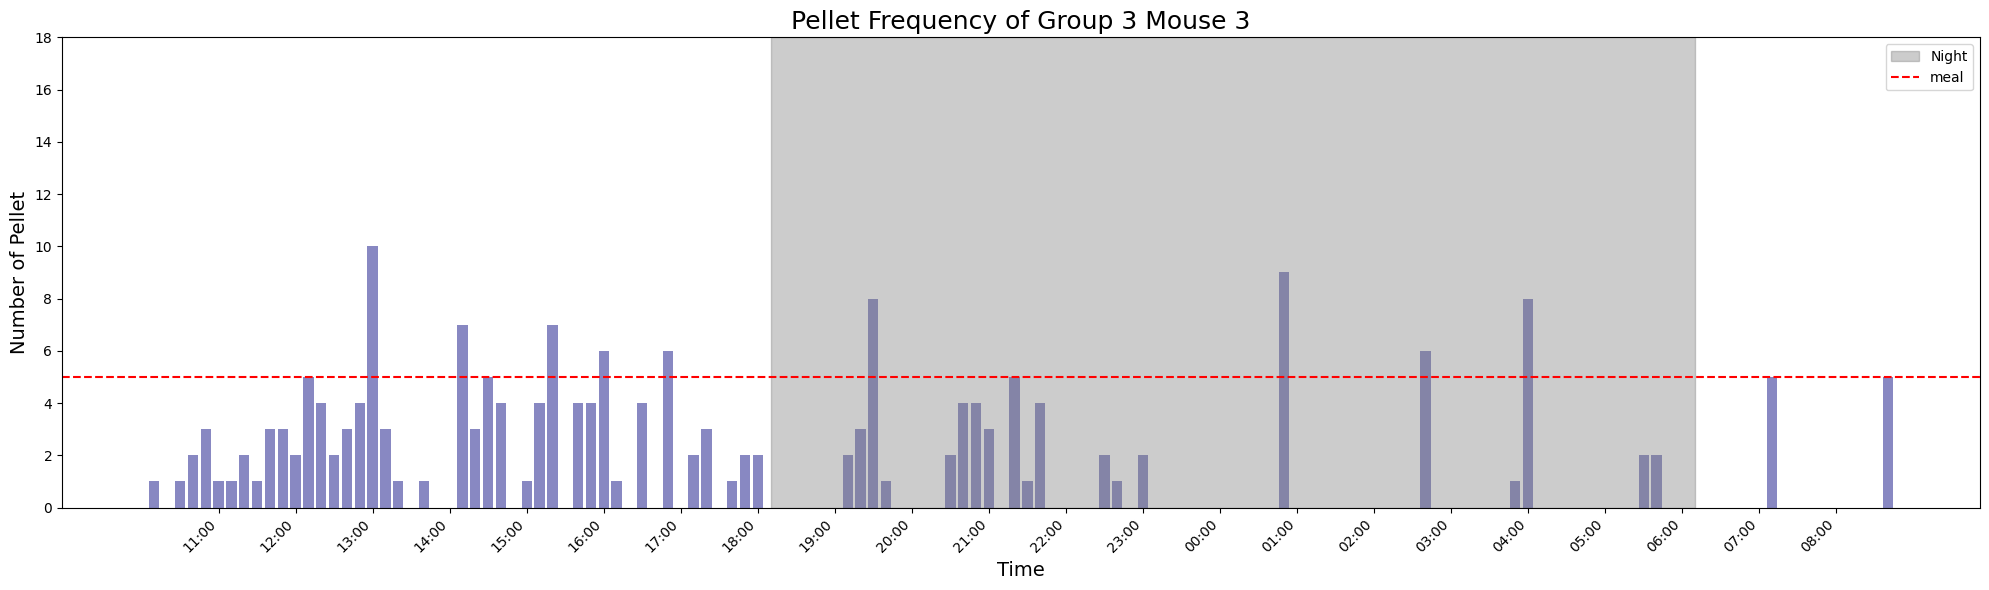

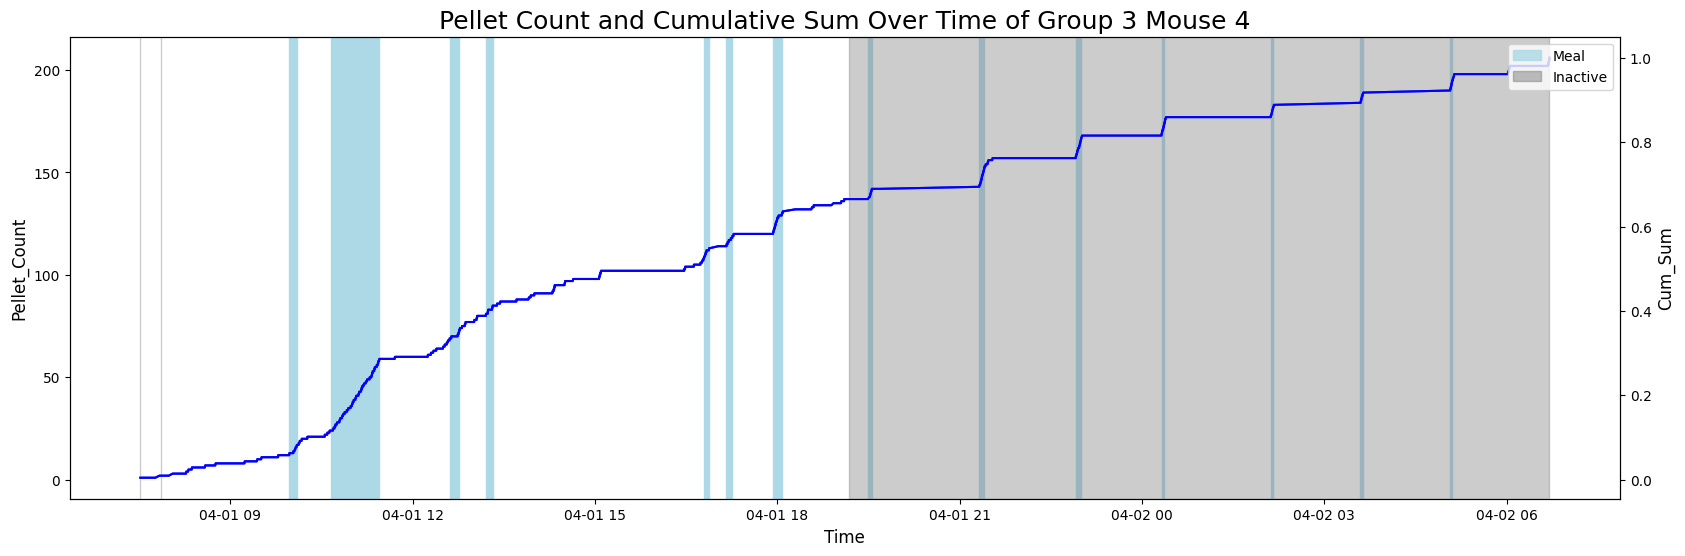

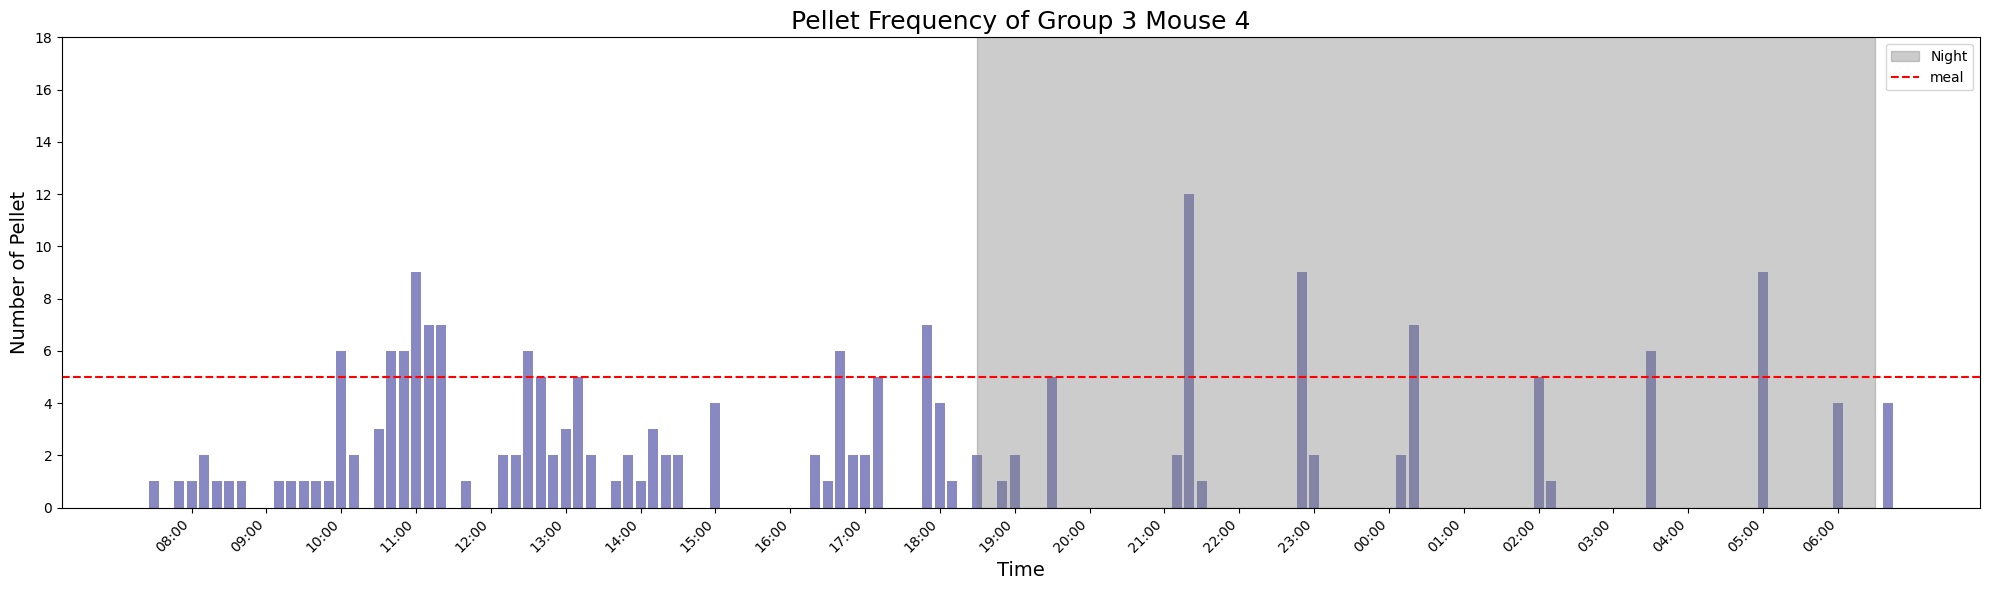

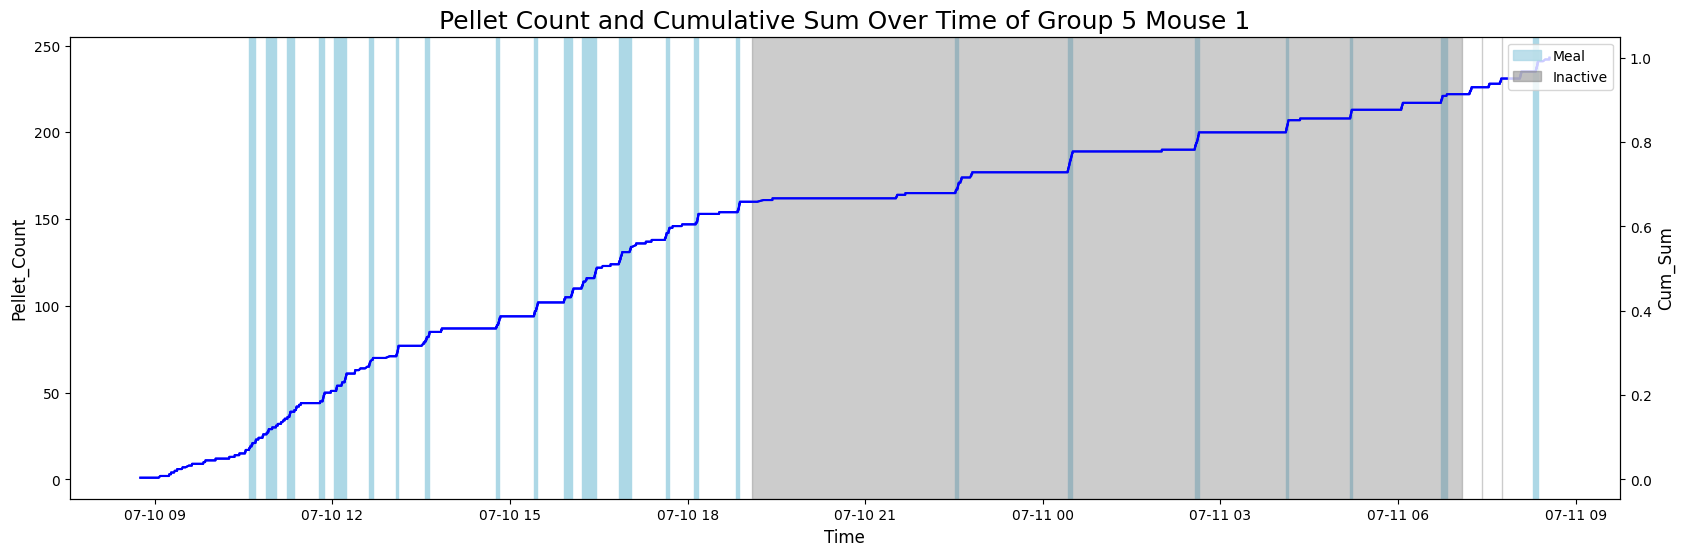

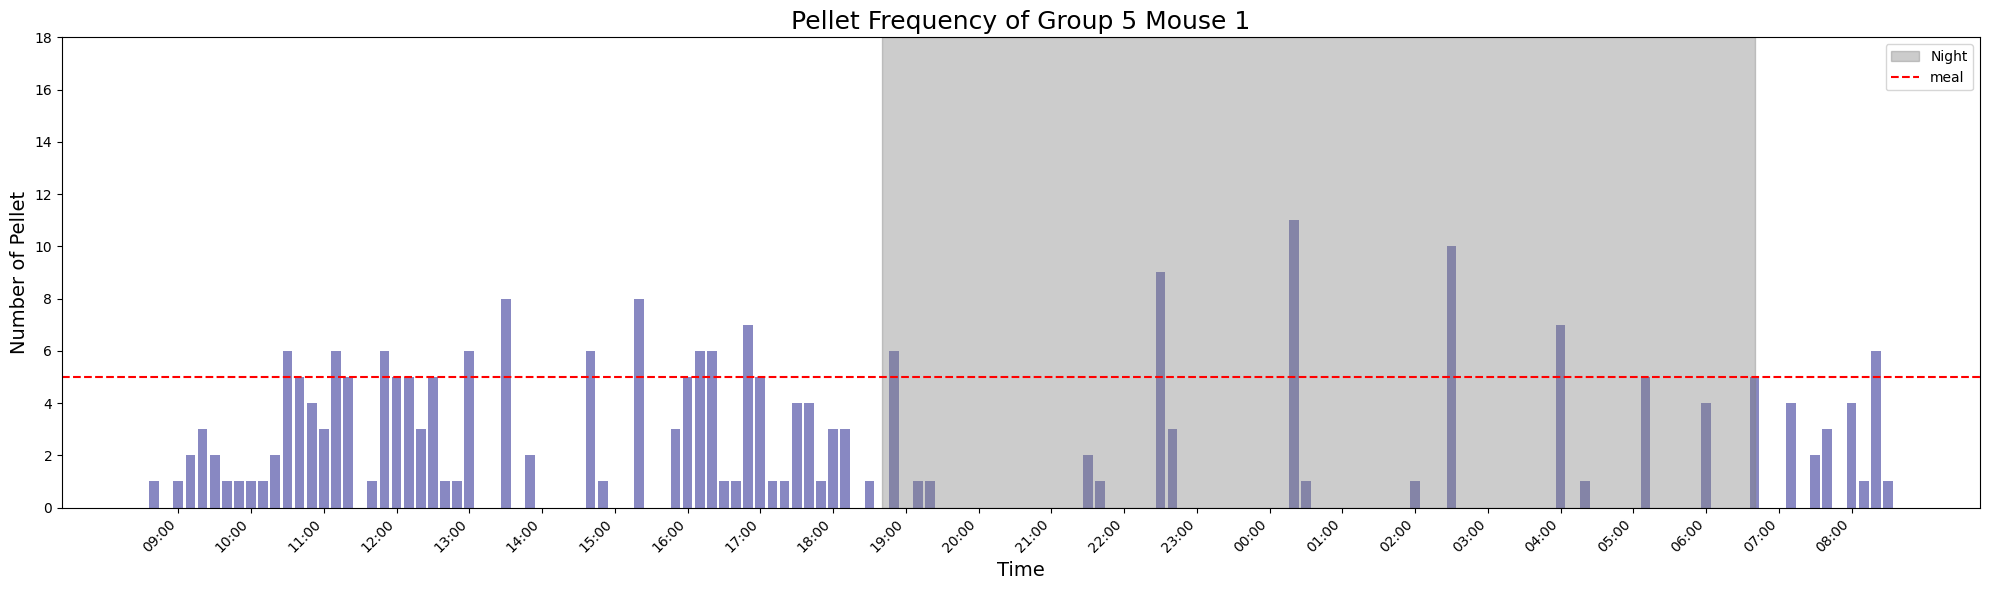

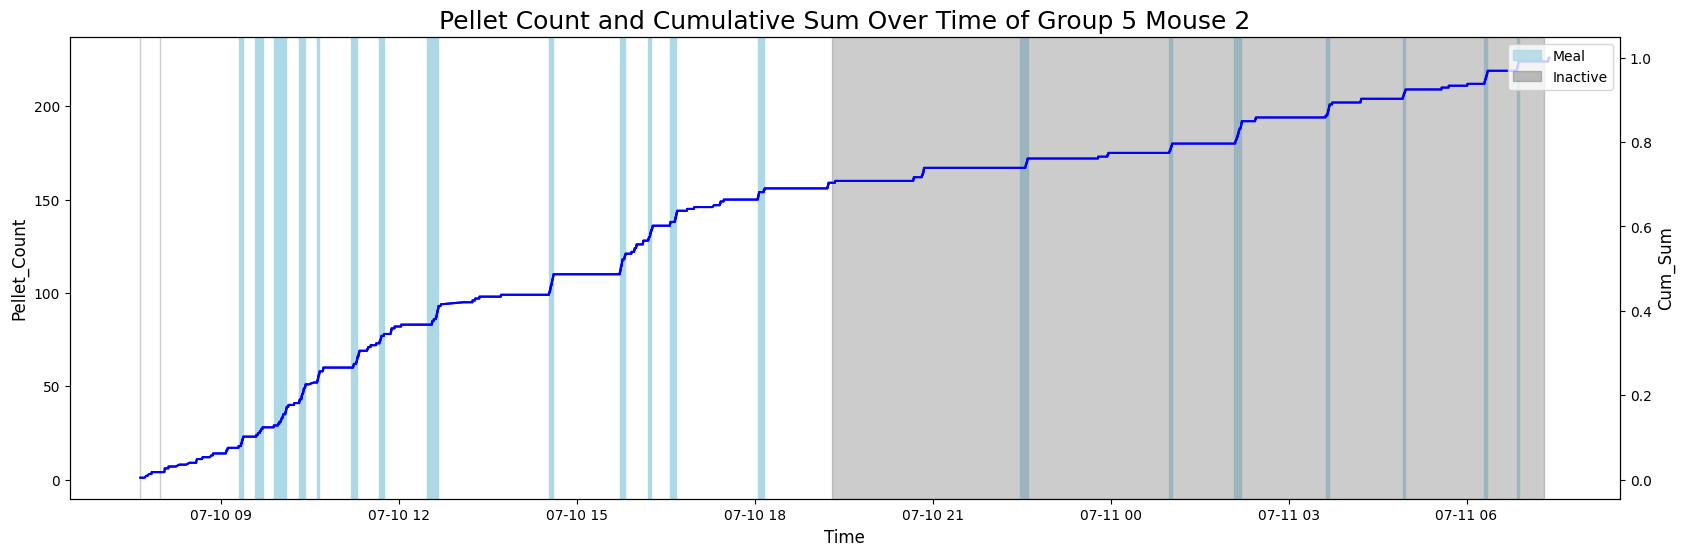

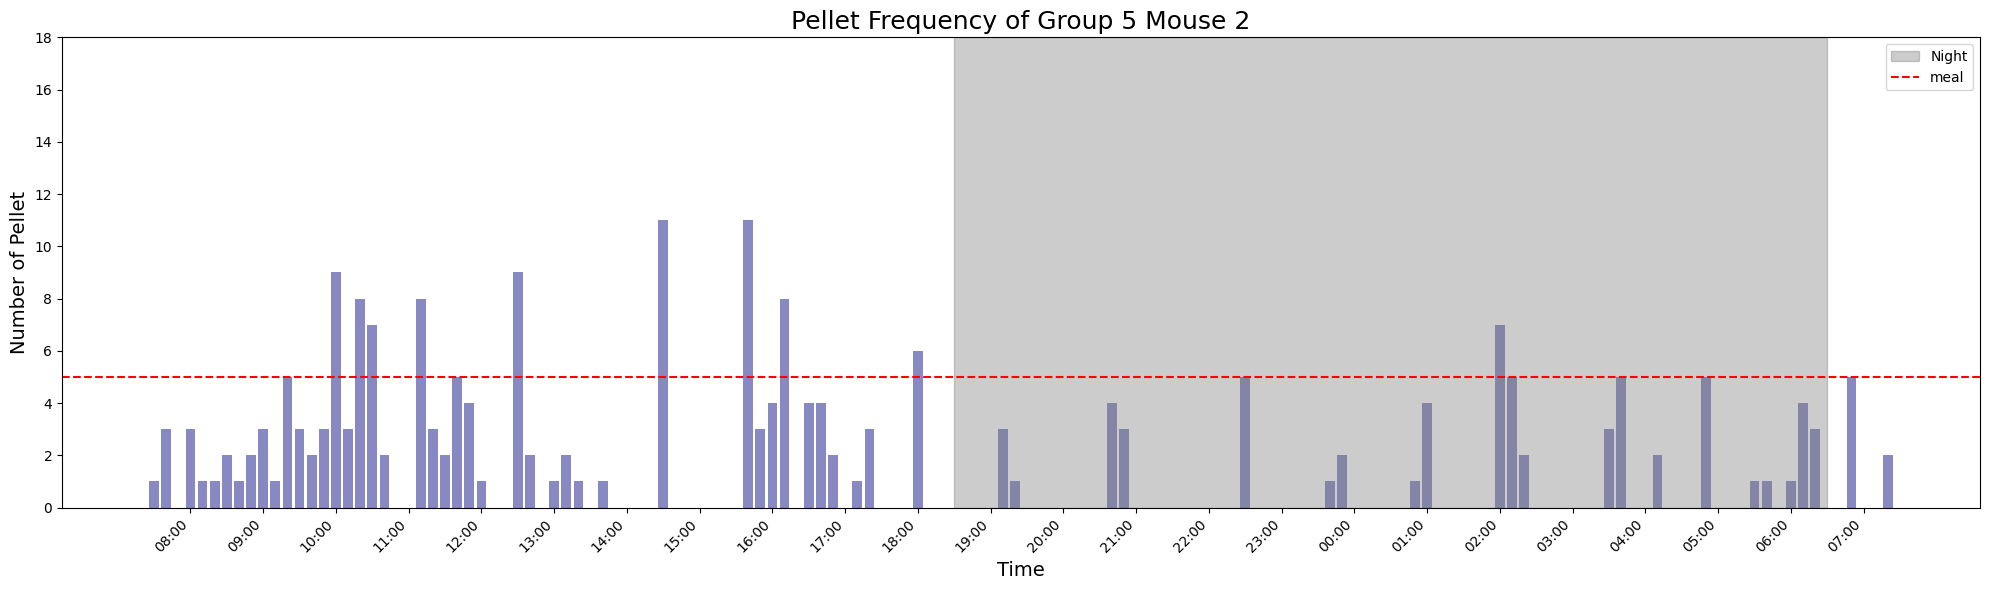

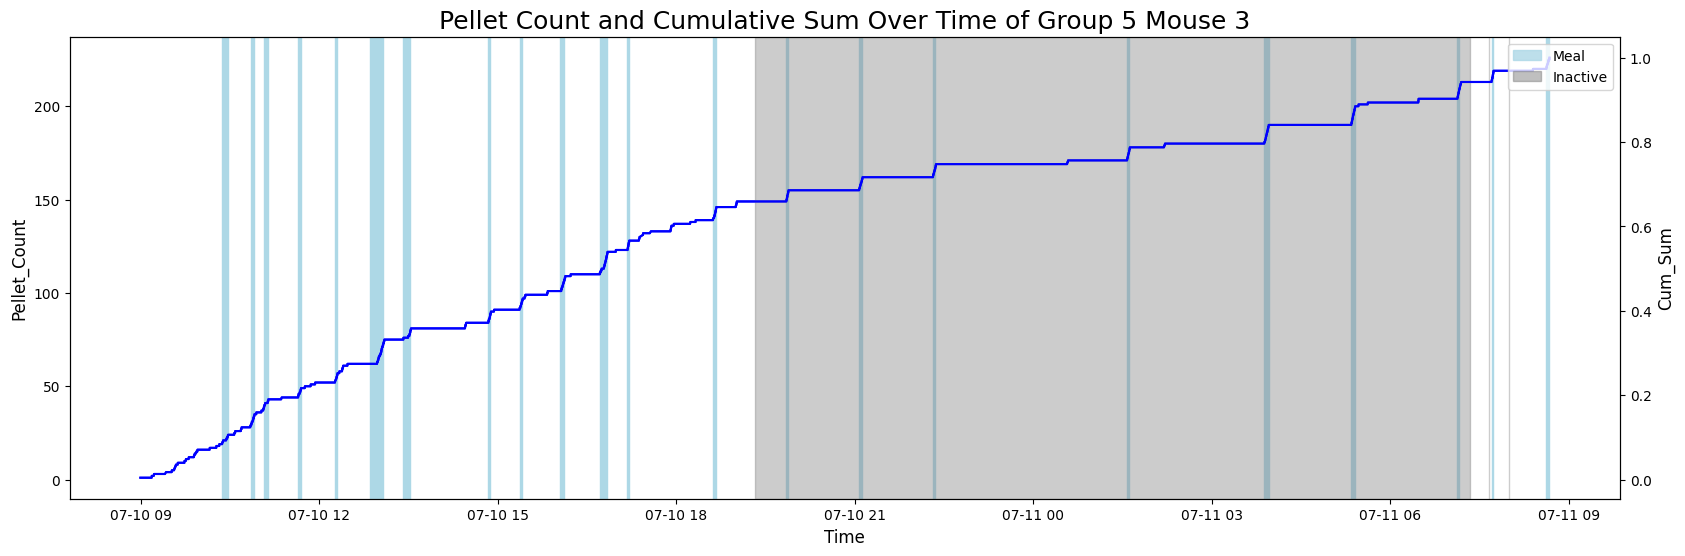

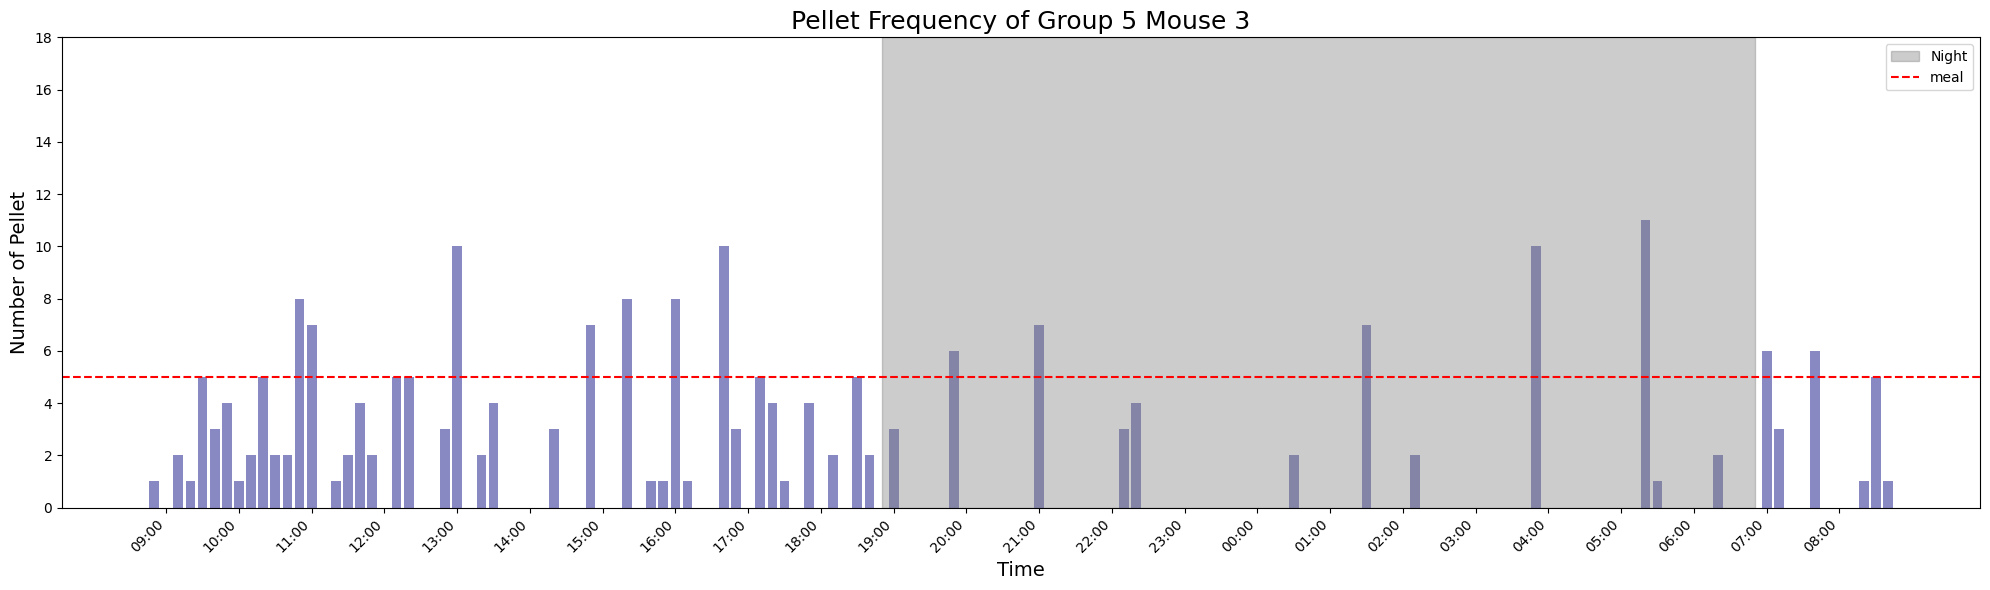

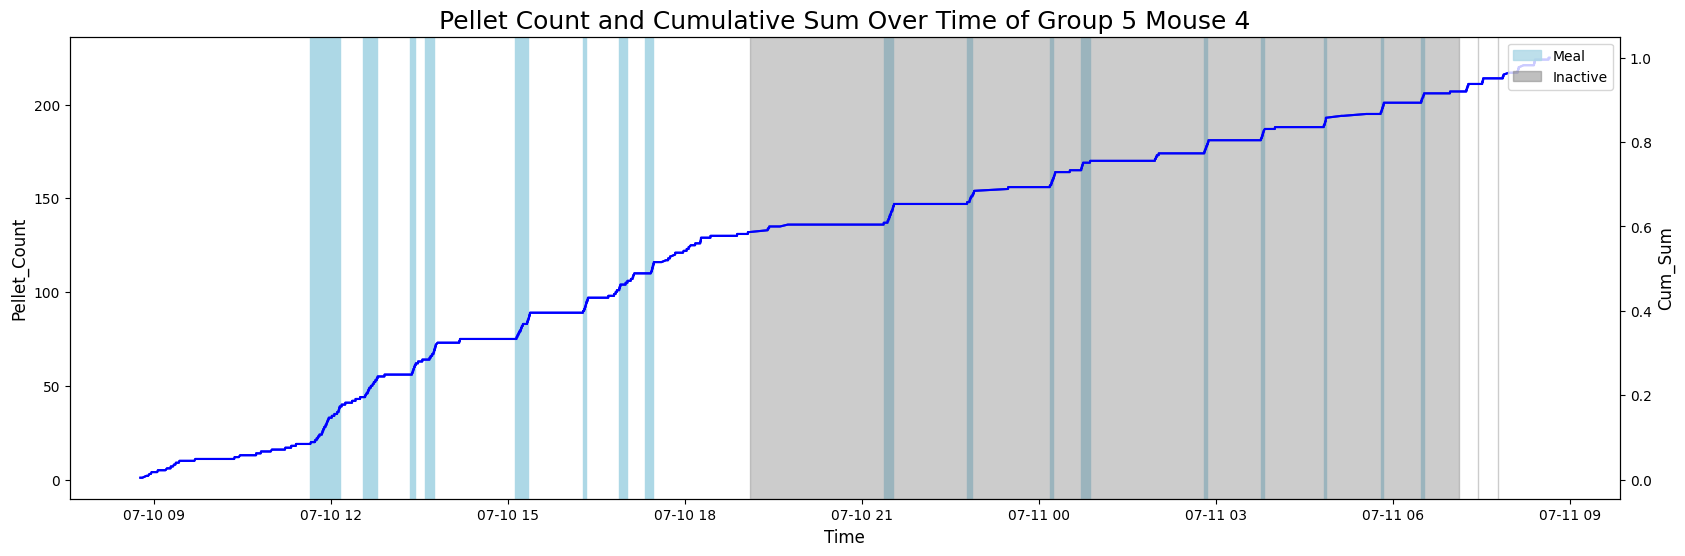

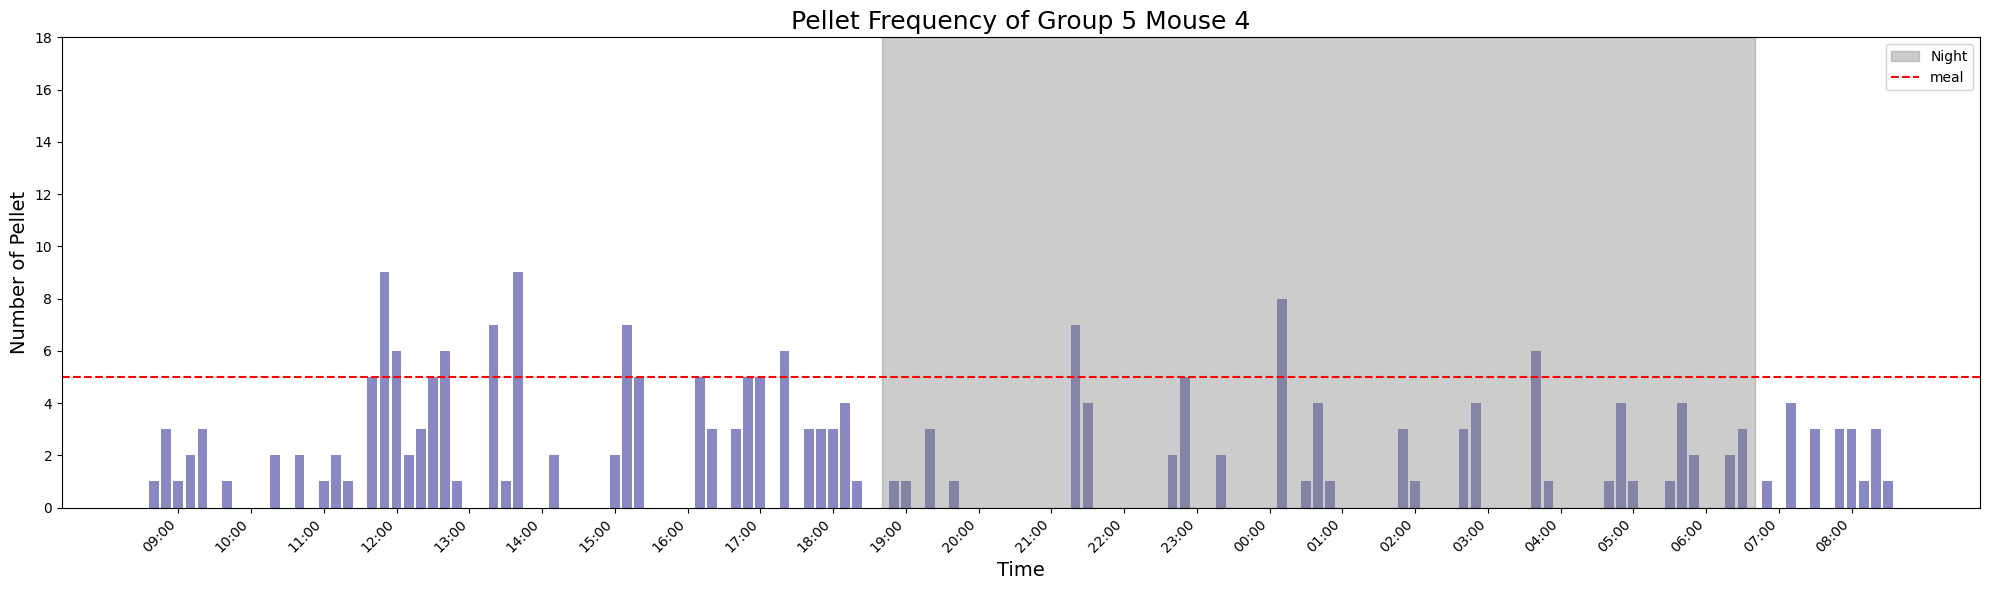

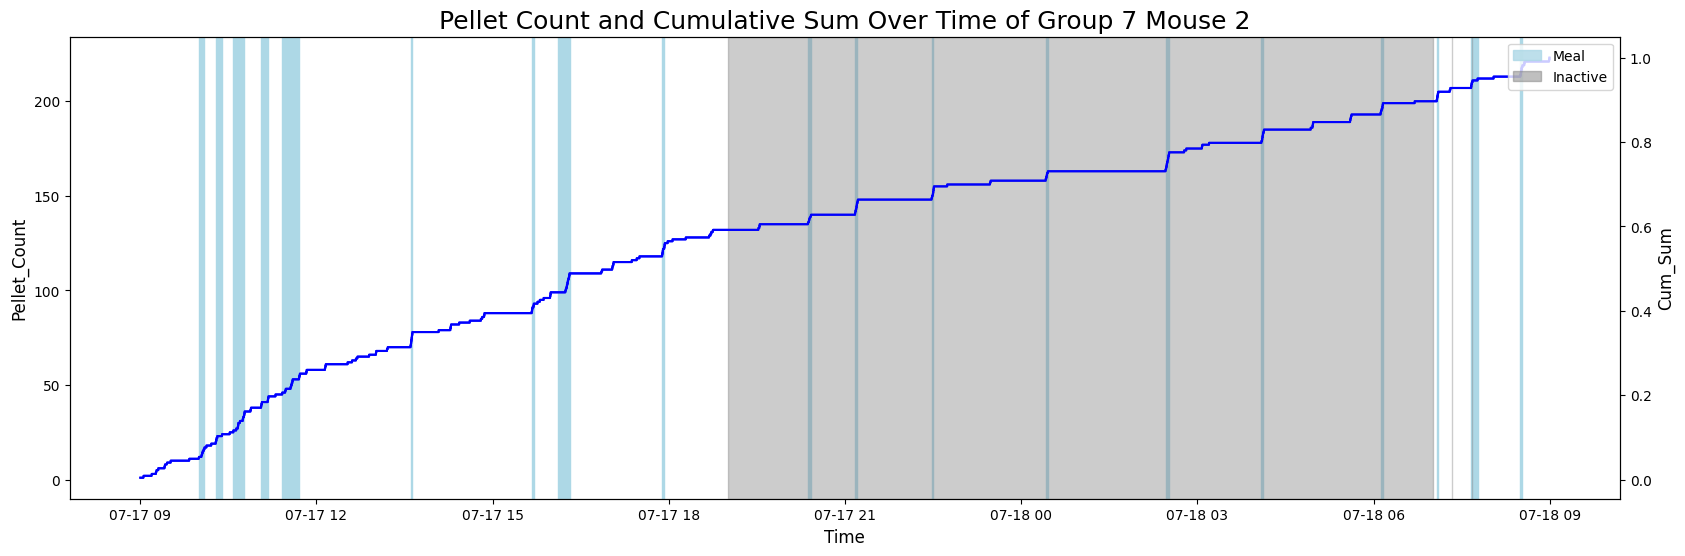

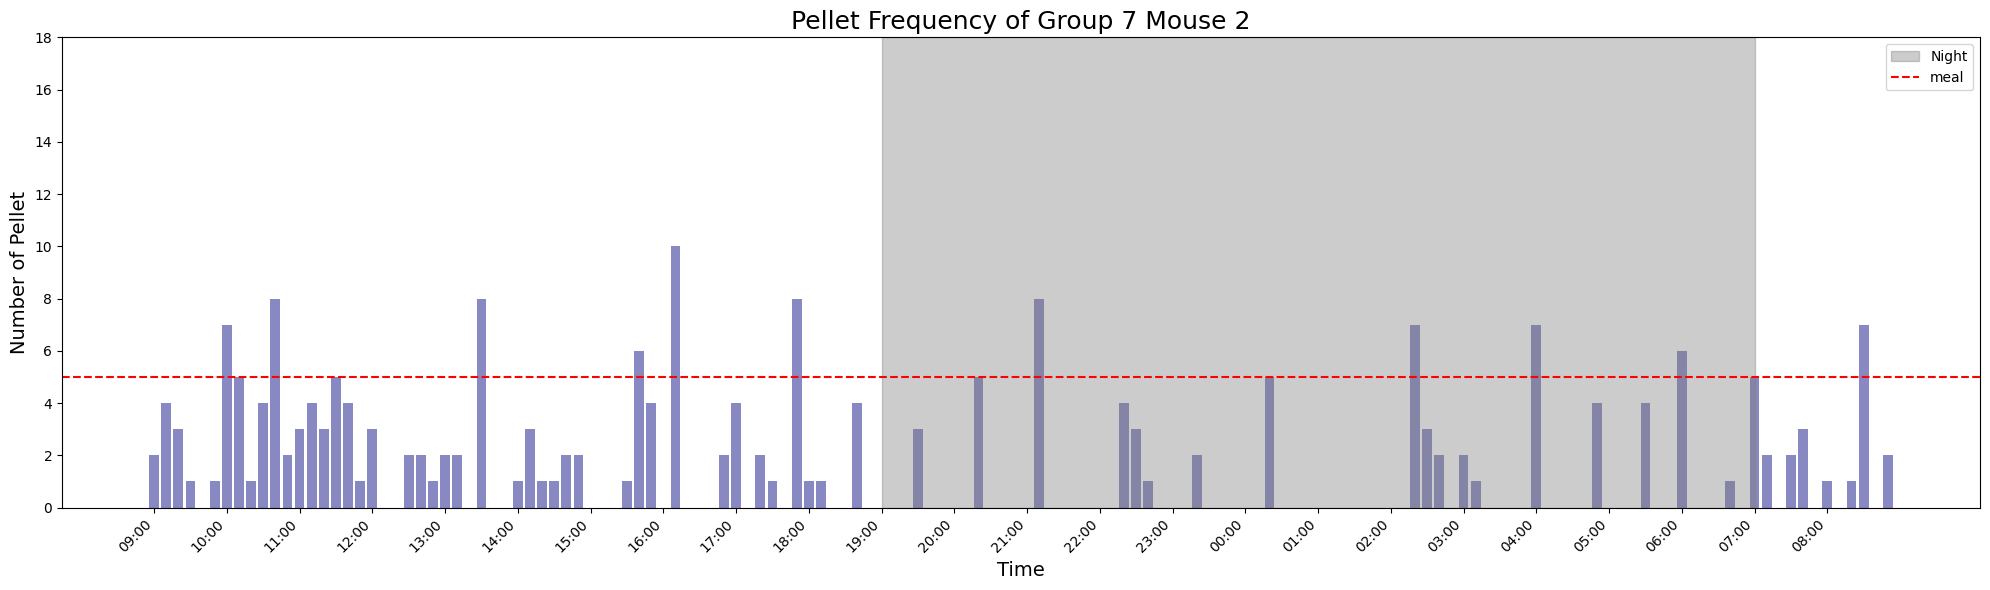

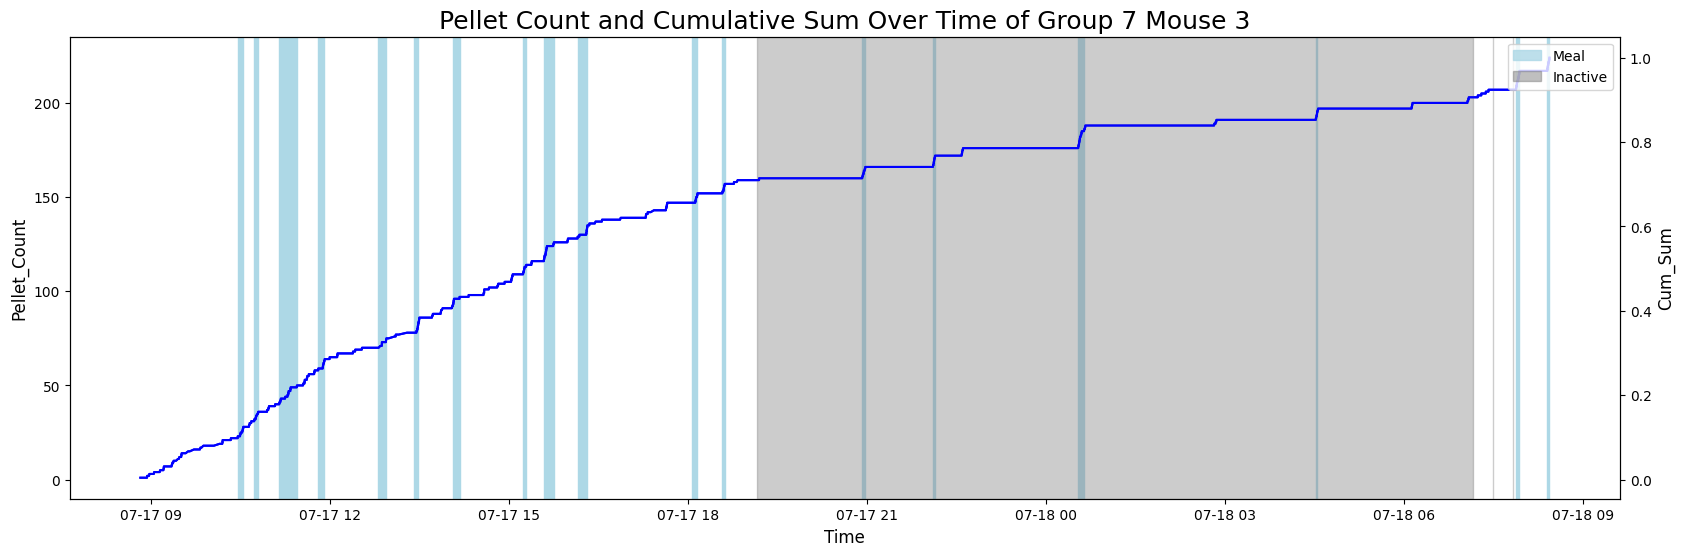

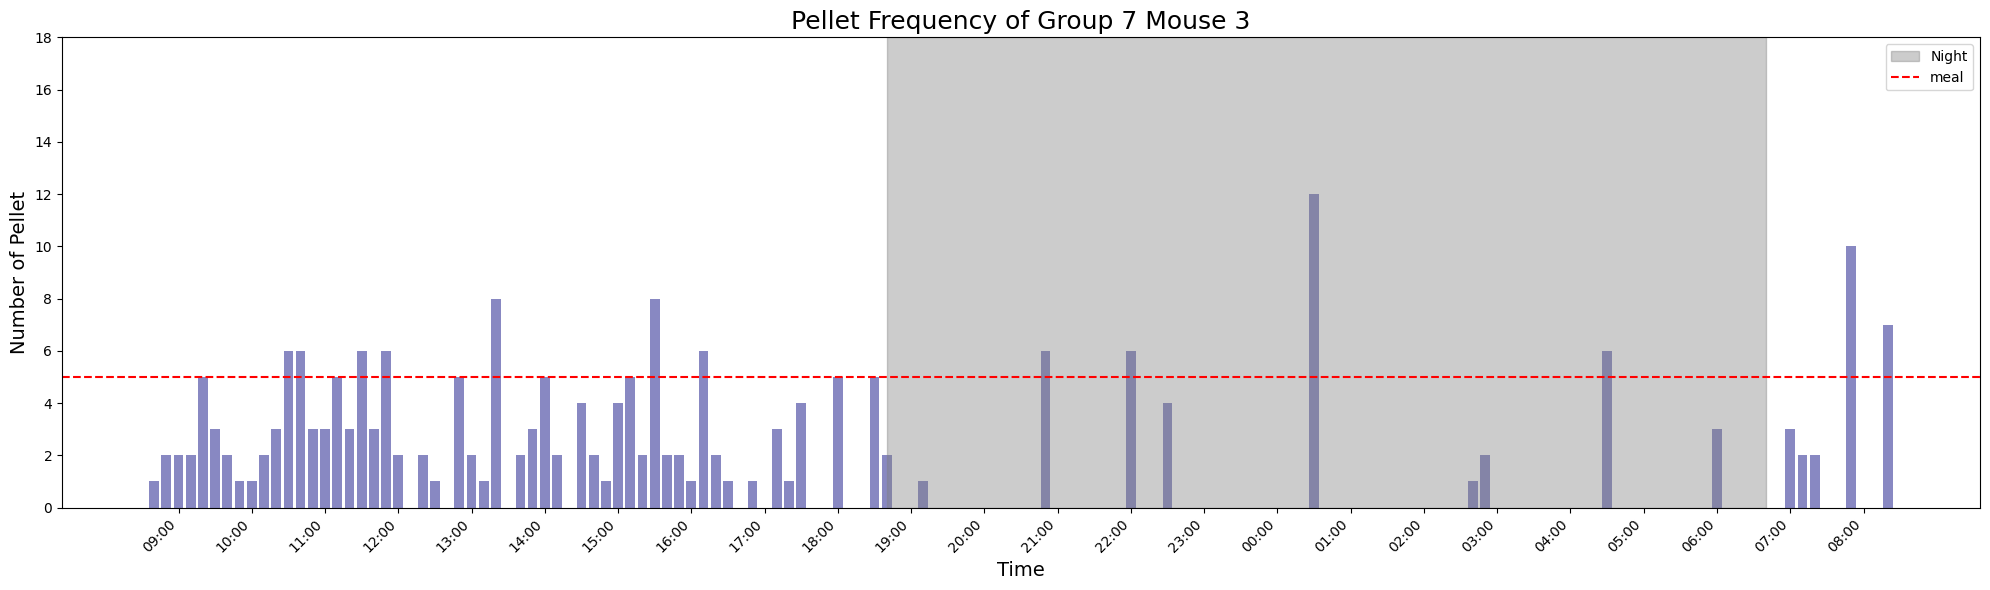

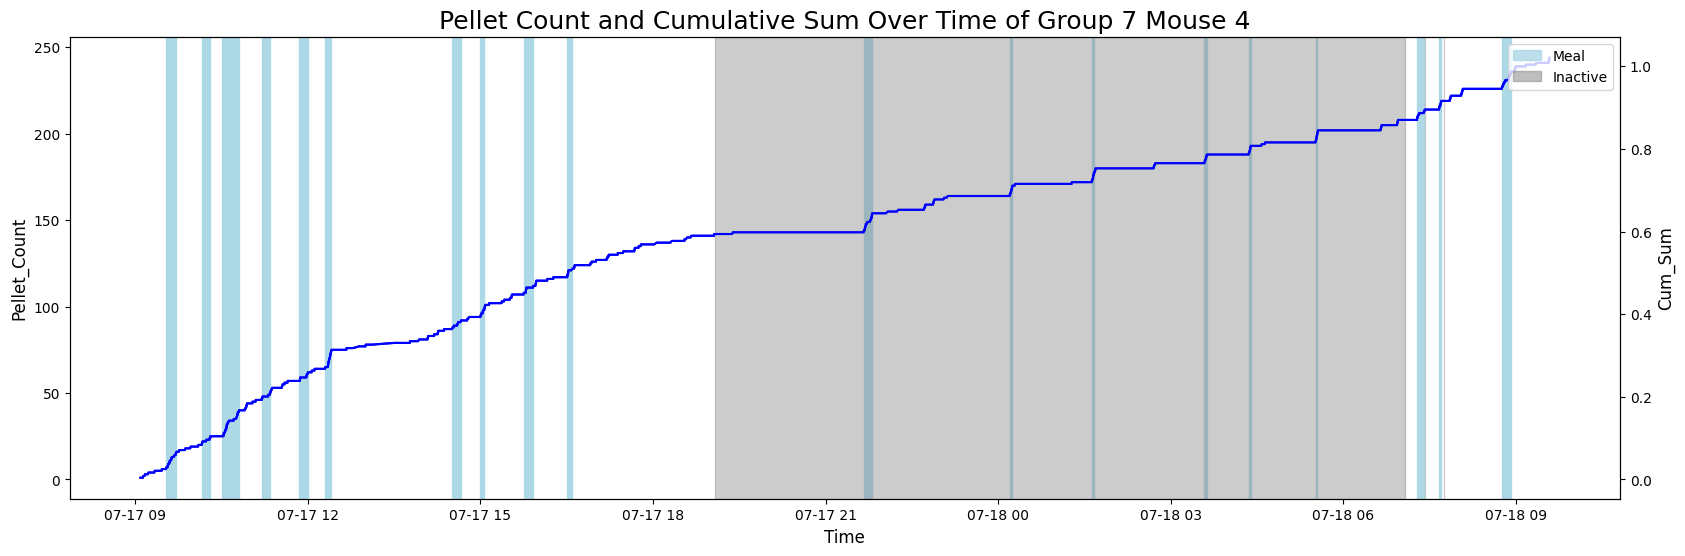

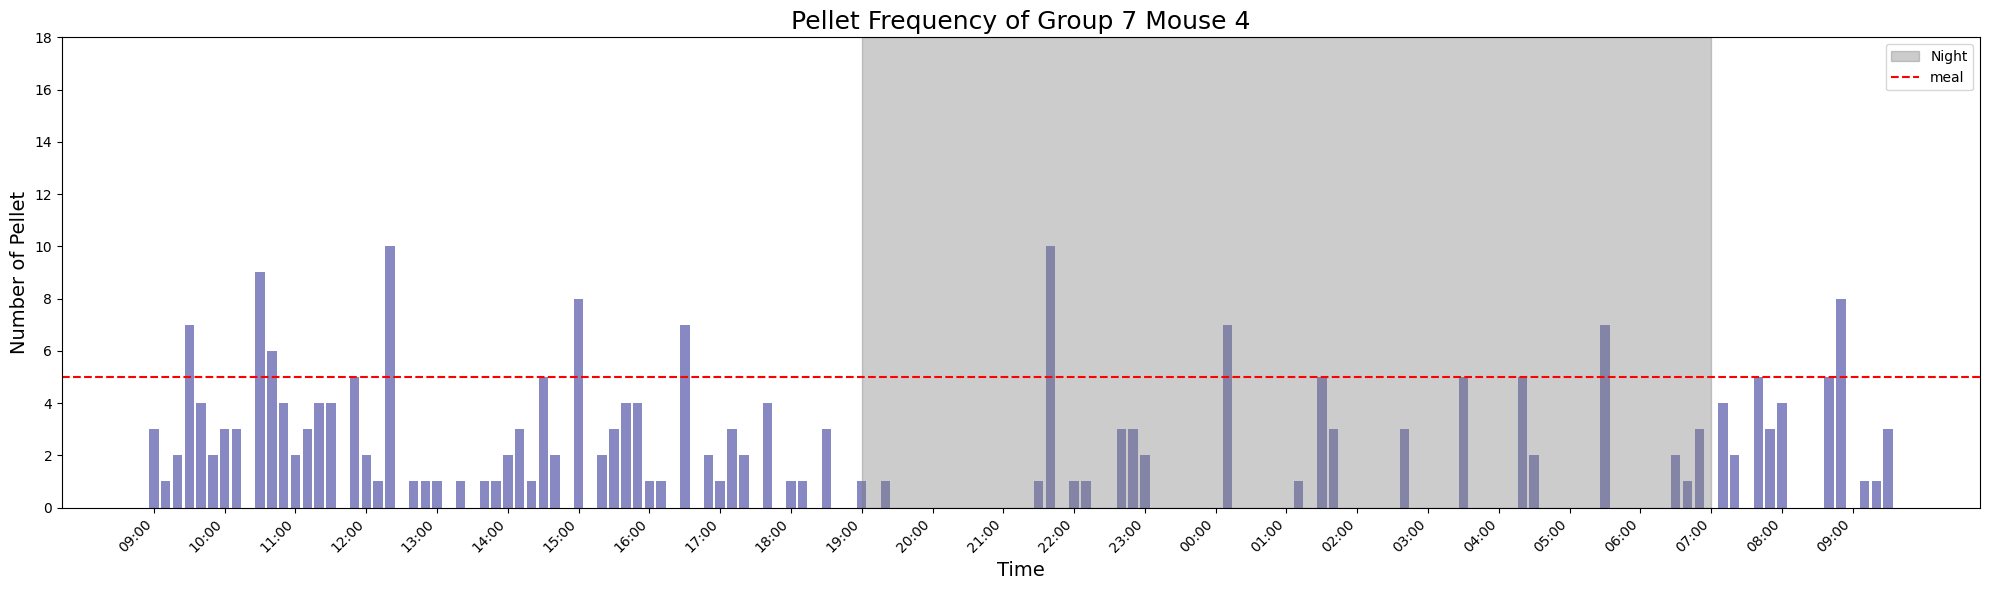

In [3]:
# use first 3 data as examples
for sheet in paths.fr1_ctrl_sheet:
    data = read_excel_by_sheet(sheet, path)
    
    # find all meals and their time period in  a list
    meal = ml.find_meals(data)
    
    # find pellet frequency in each 10=minute block
    group = ml.find_pellet_frequency(data)
    
    bhv, num = tl.get_bhv_num(sheet)
    
    # plot cumulative pellet consumption graph
    ml.graphing_cum_count(data, meal, bhv, num)
    # plot pellet frequency
    ml.graph_pellet_frequency(group, bhv, num)
    
    # calculate average pellet in unit of hour
    temp = ml.average_pellet(group)
    ctrl_pellet_avg.append(temp)
    # find average meal each day
    avg = round(len(meal)/ml.experiment_duration(data), 2)
    fr1_ctrl_meal_count.append(avg)

## CASK Group

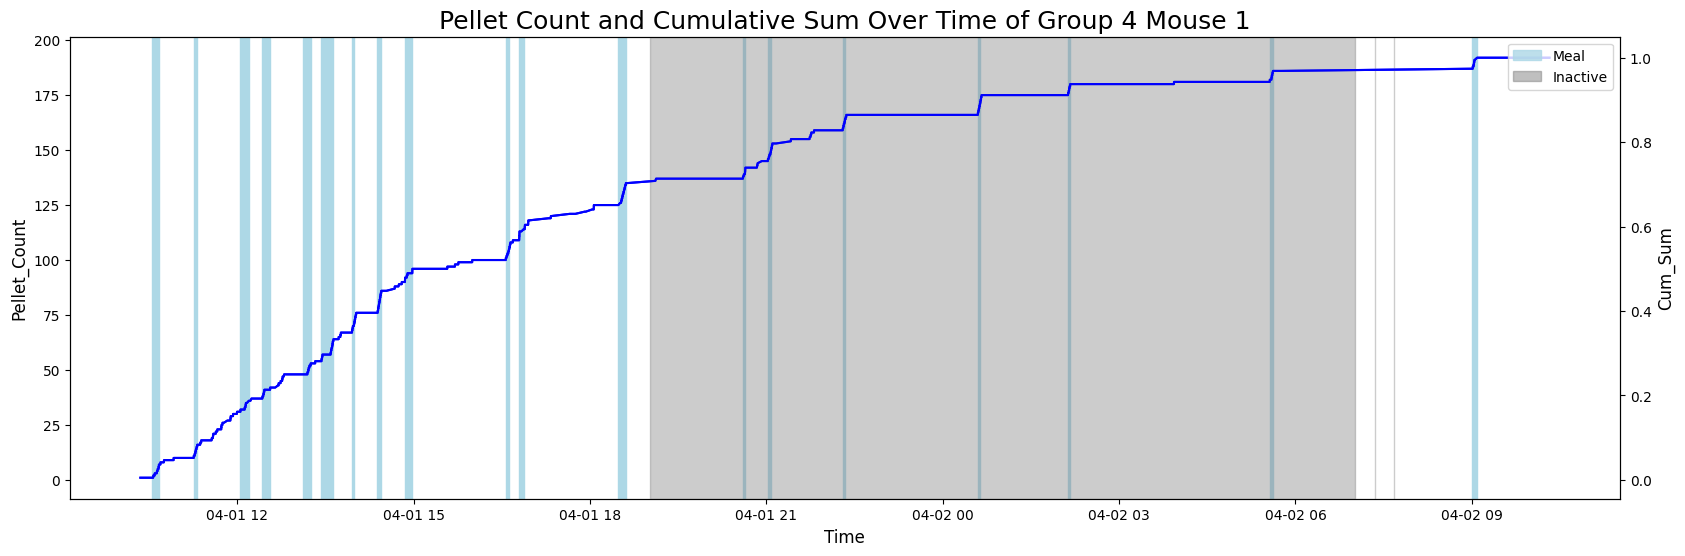

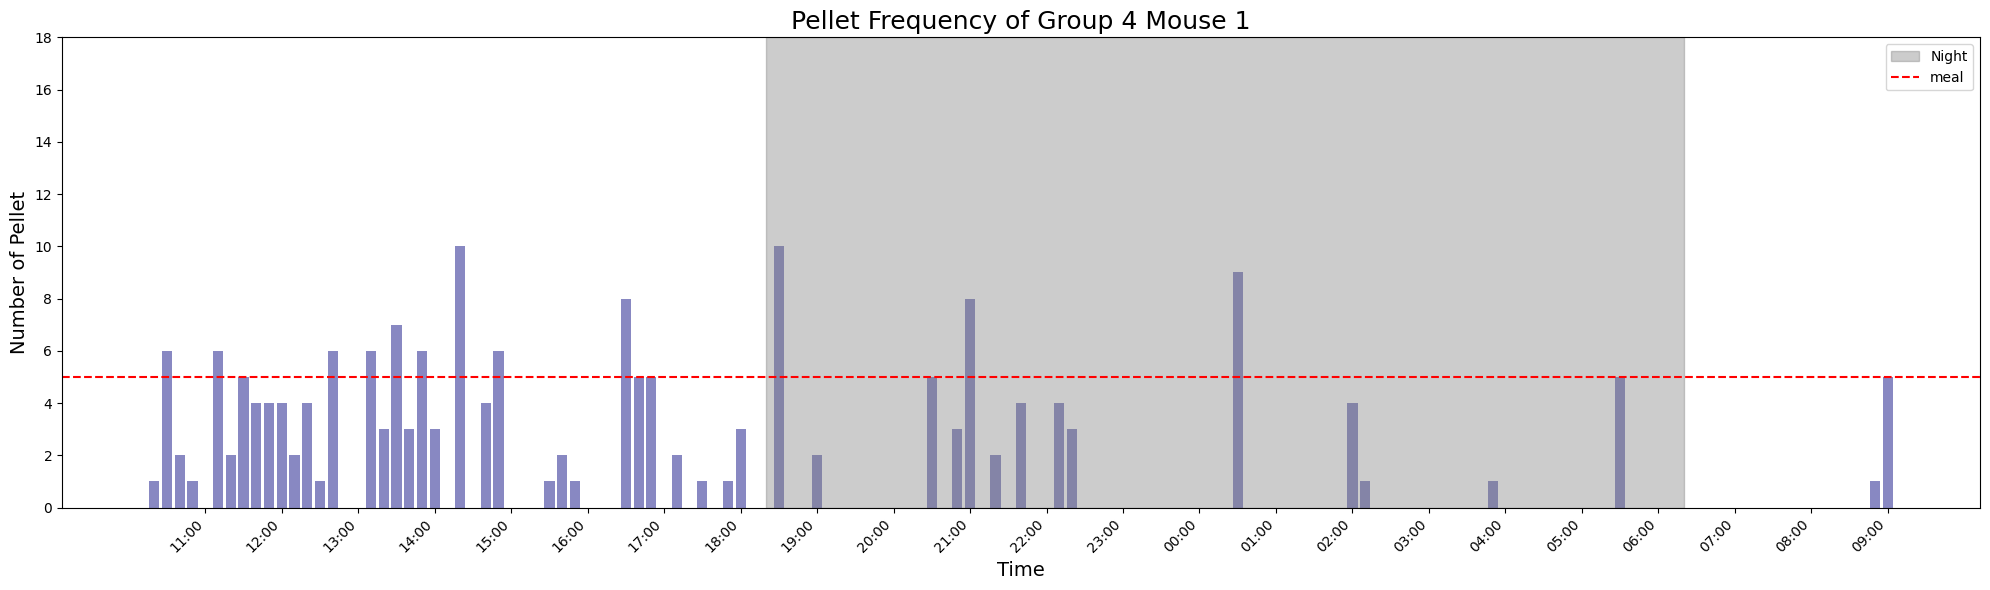

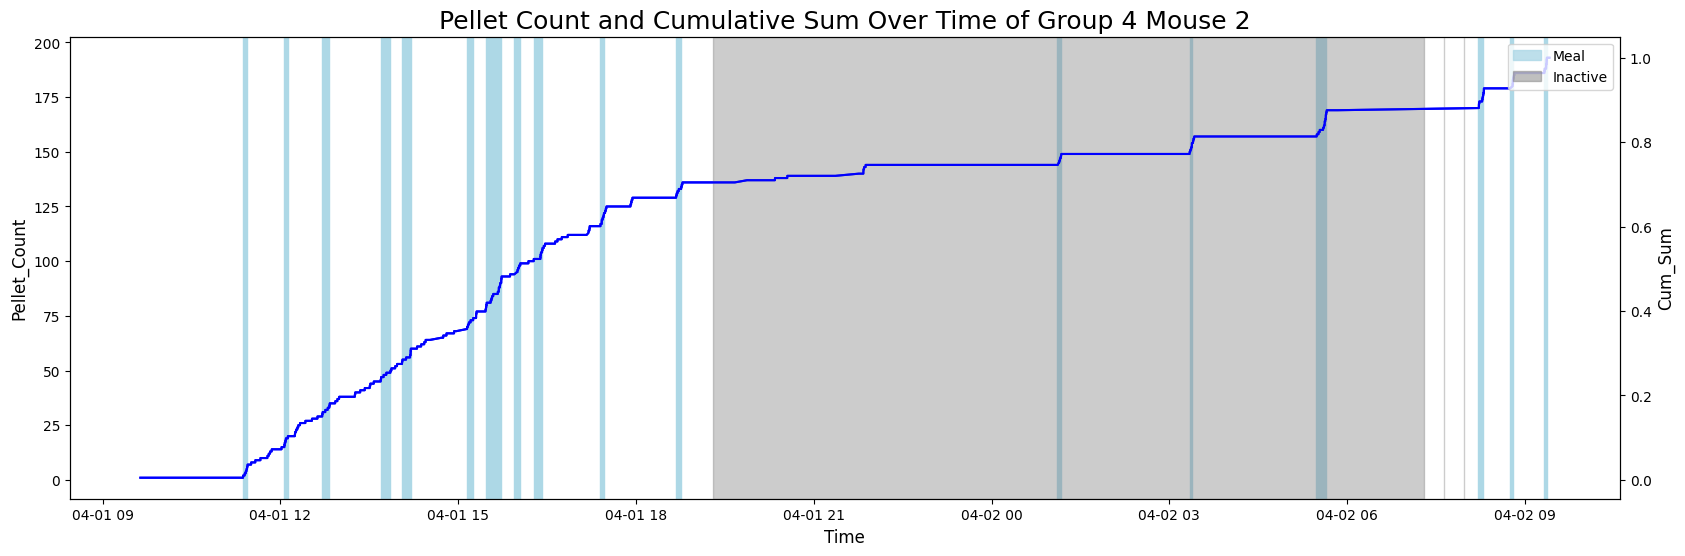

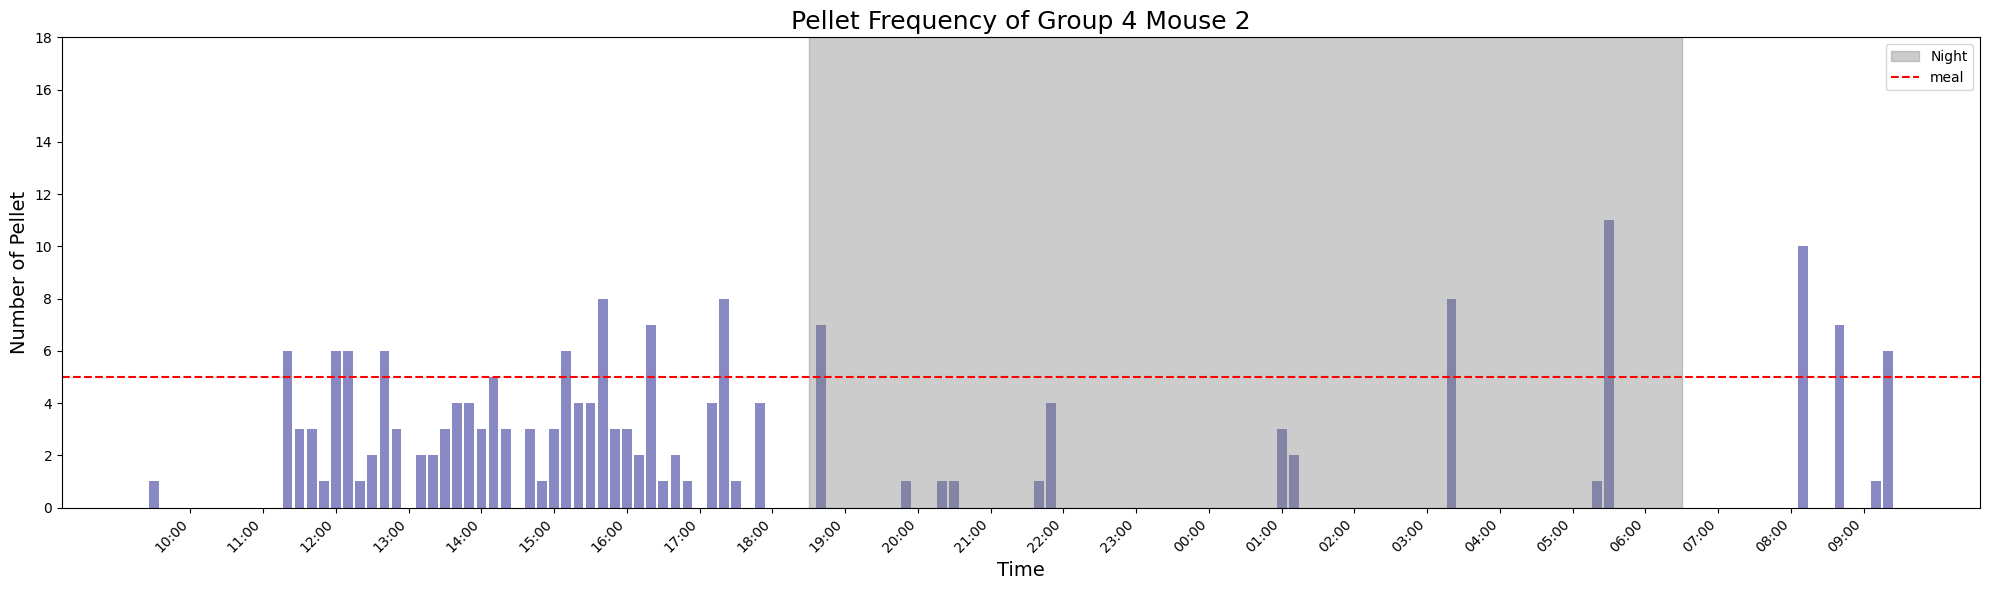

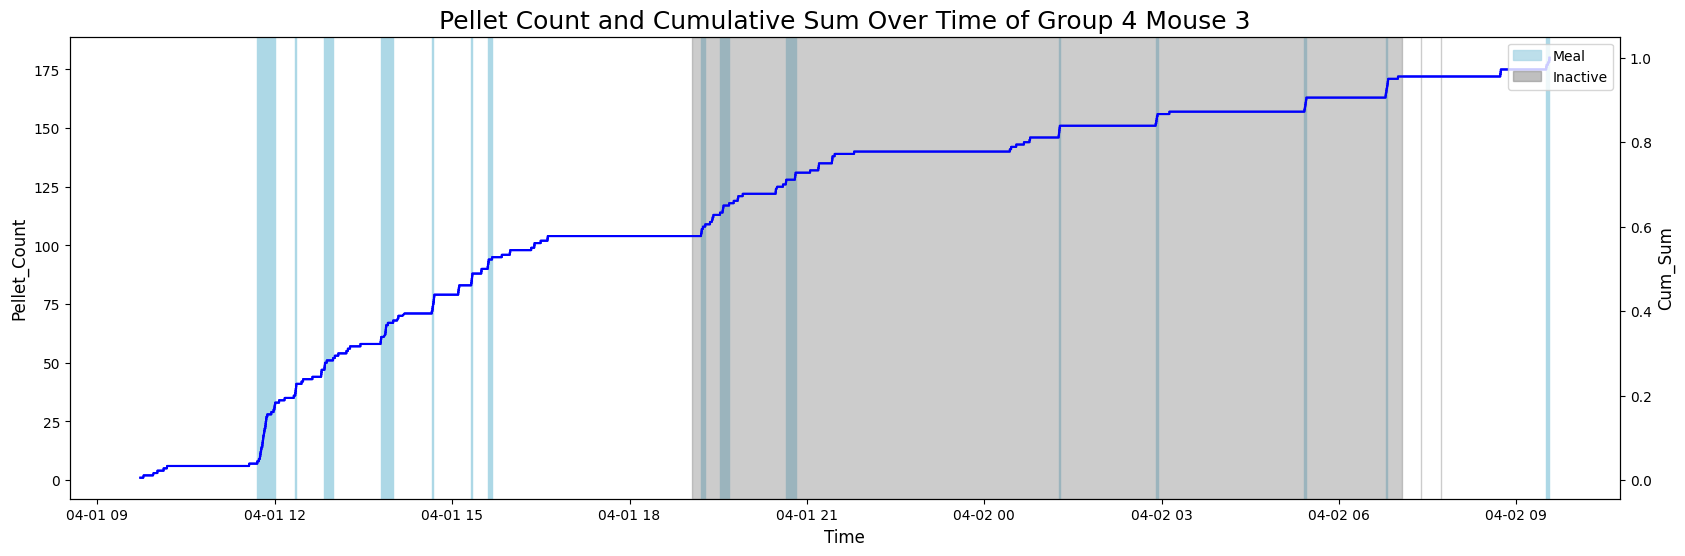

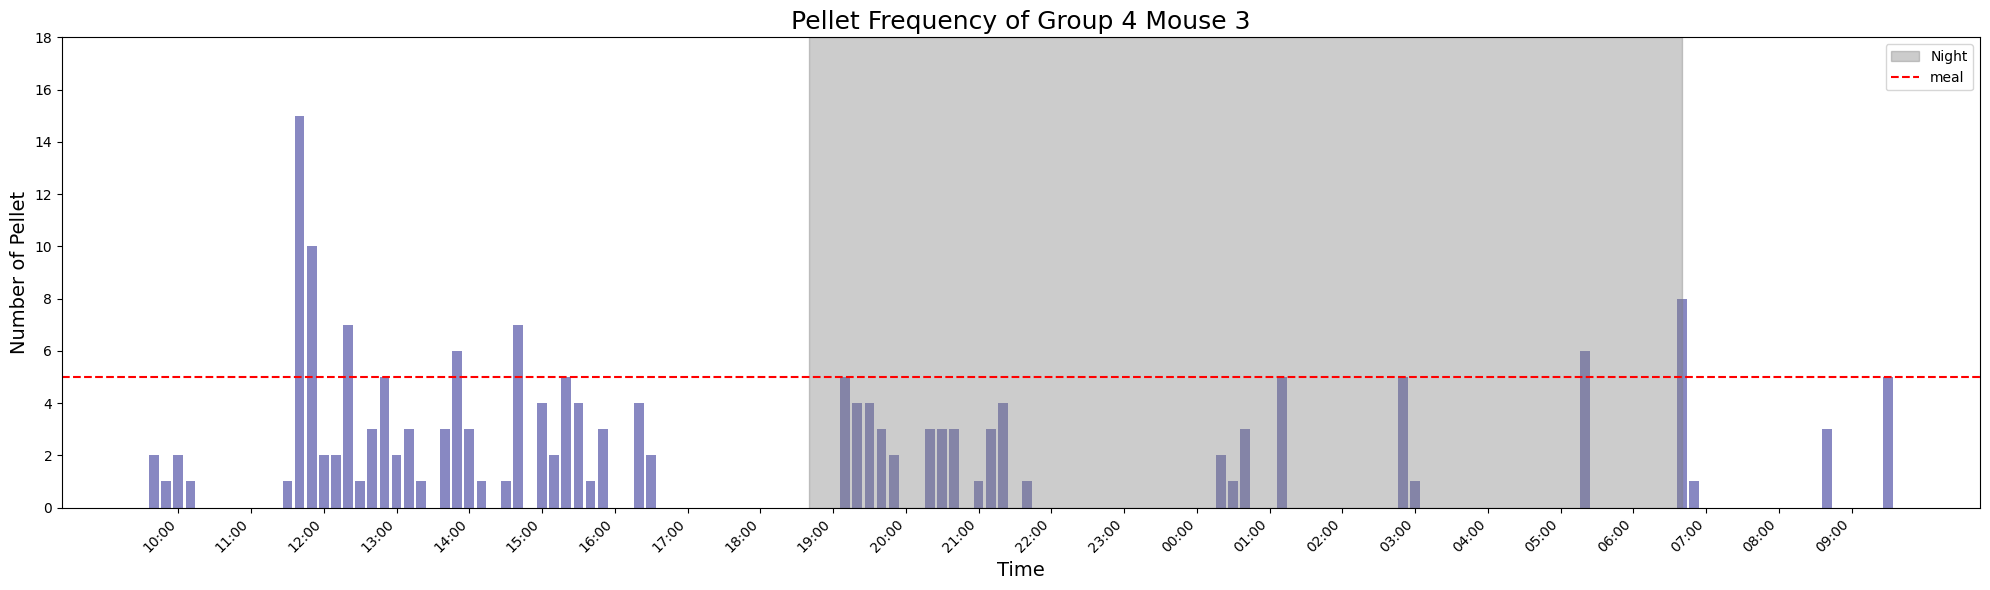

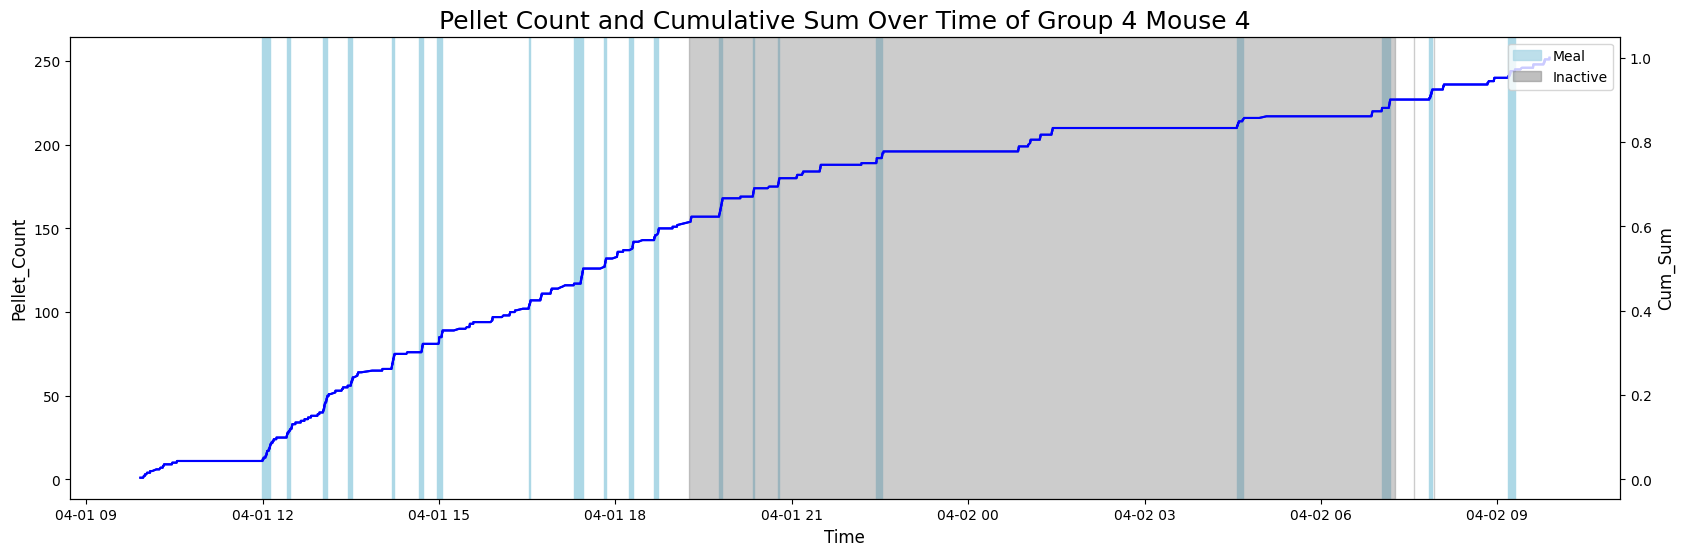

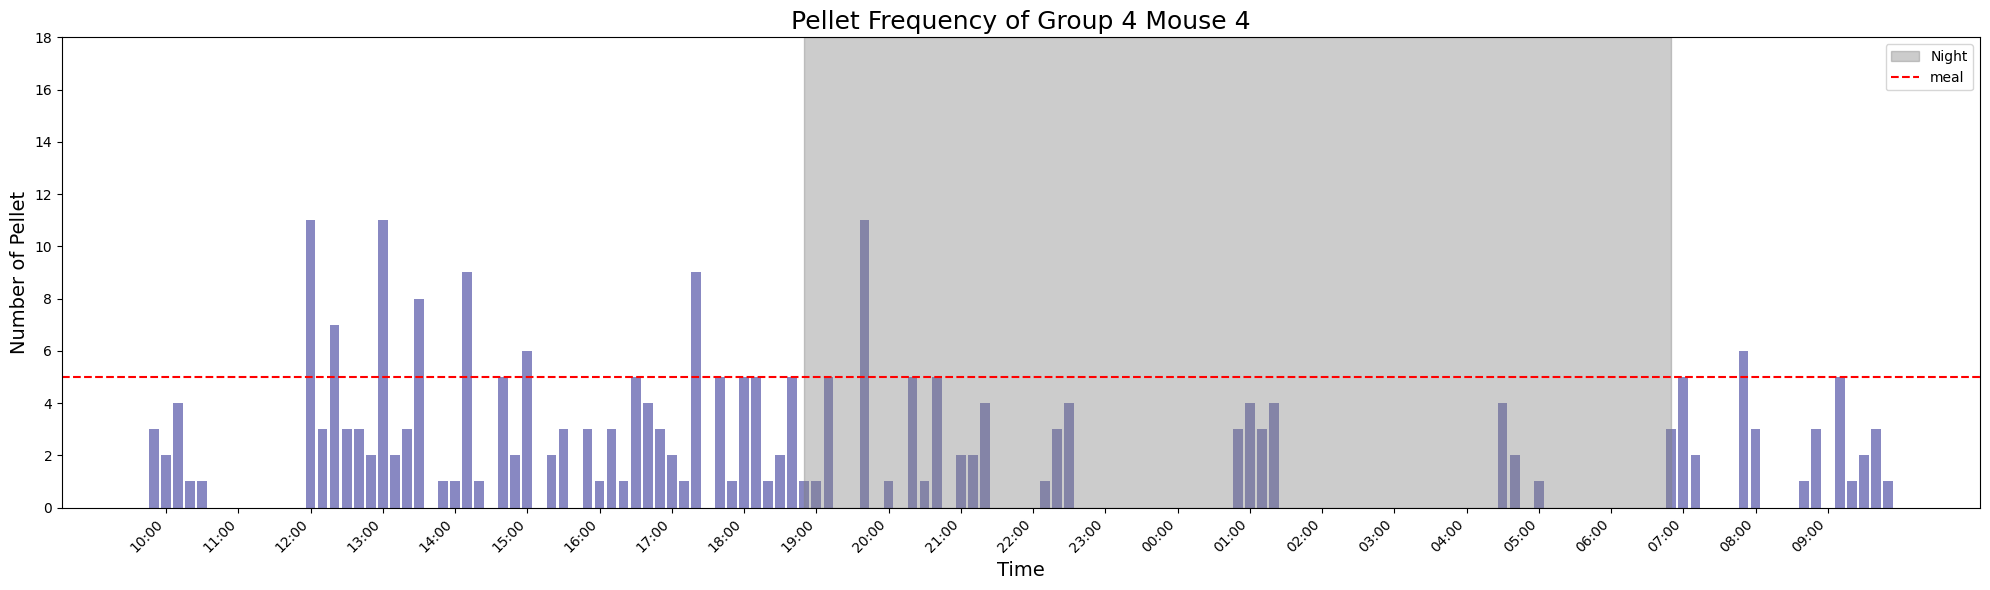

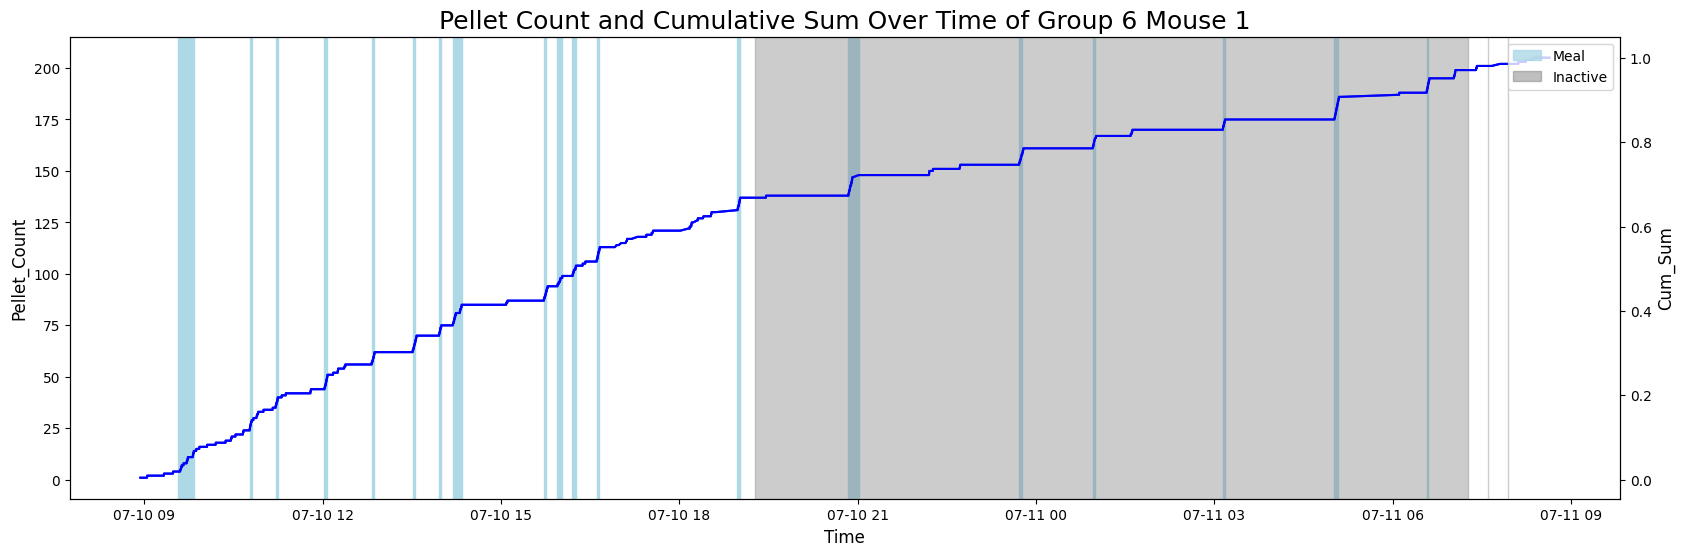

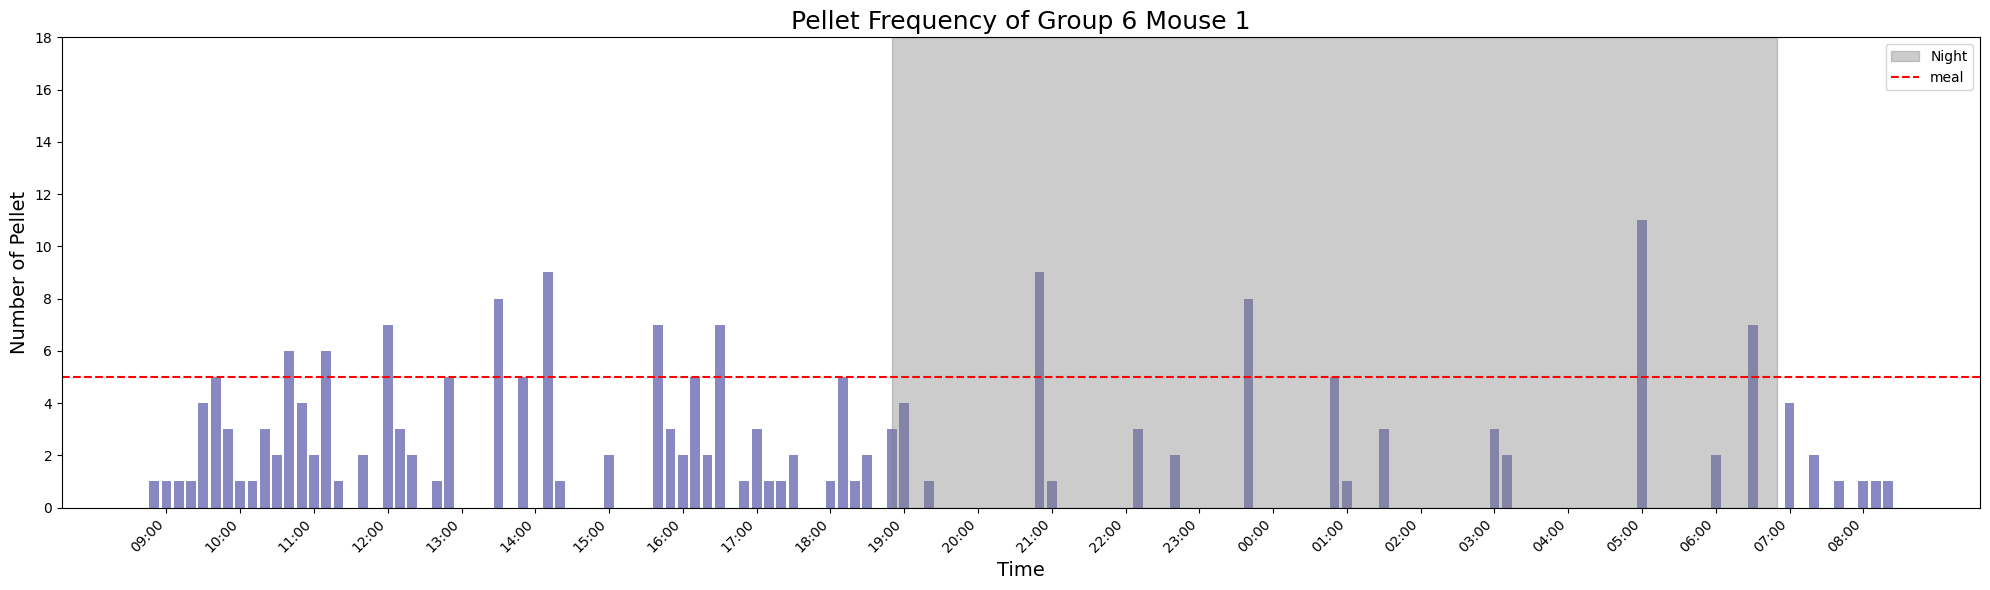

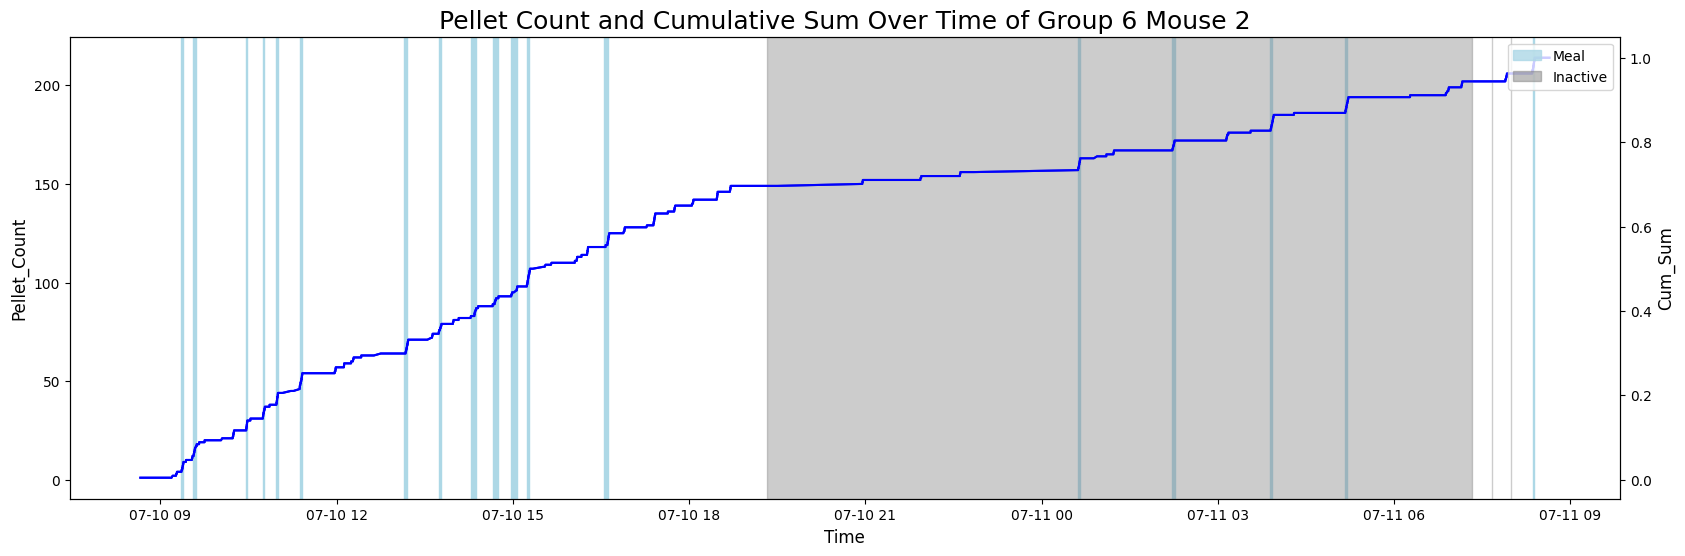

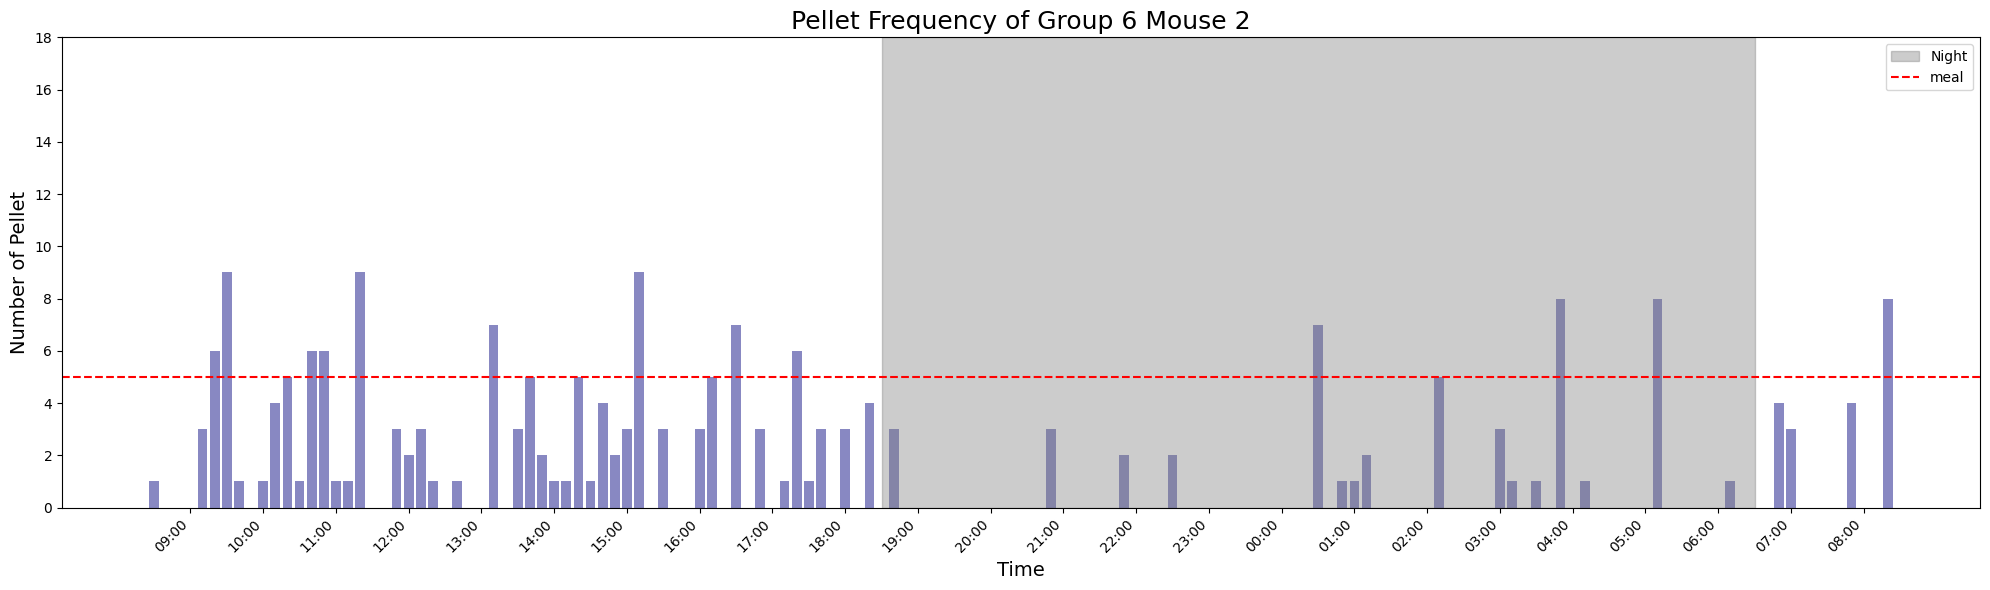

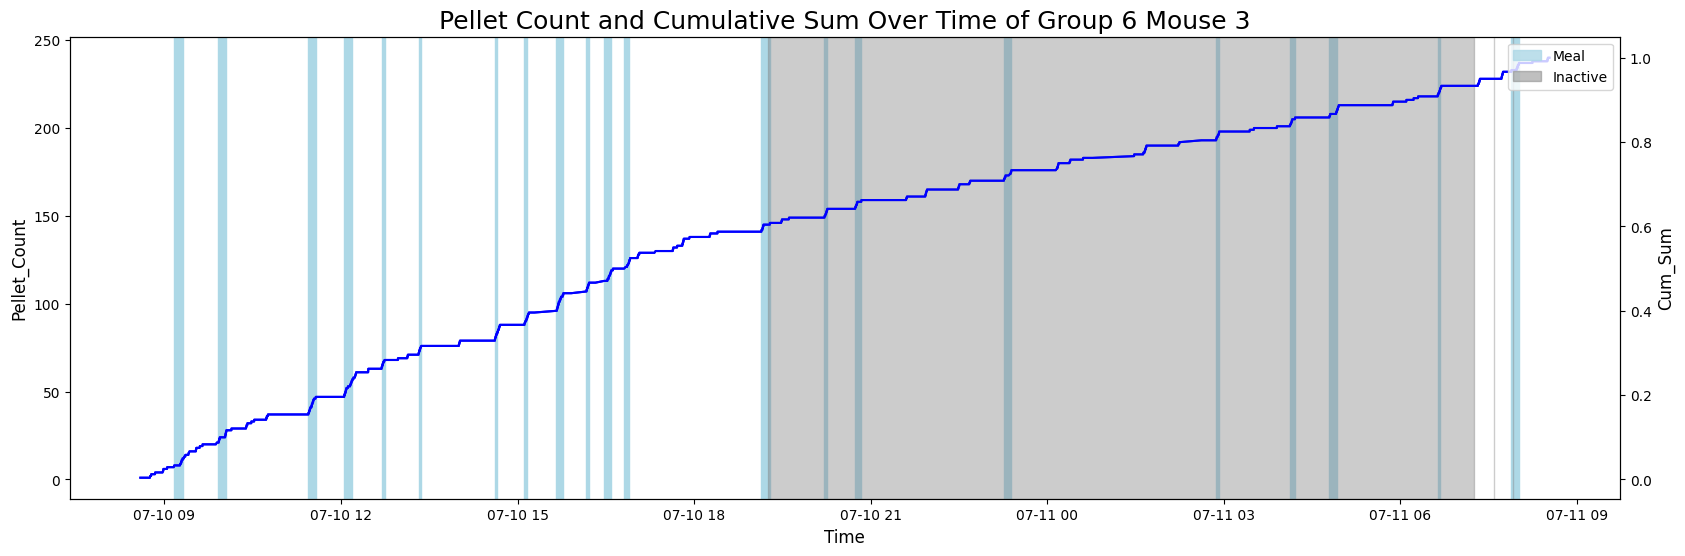

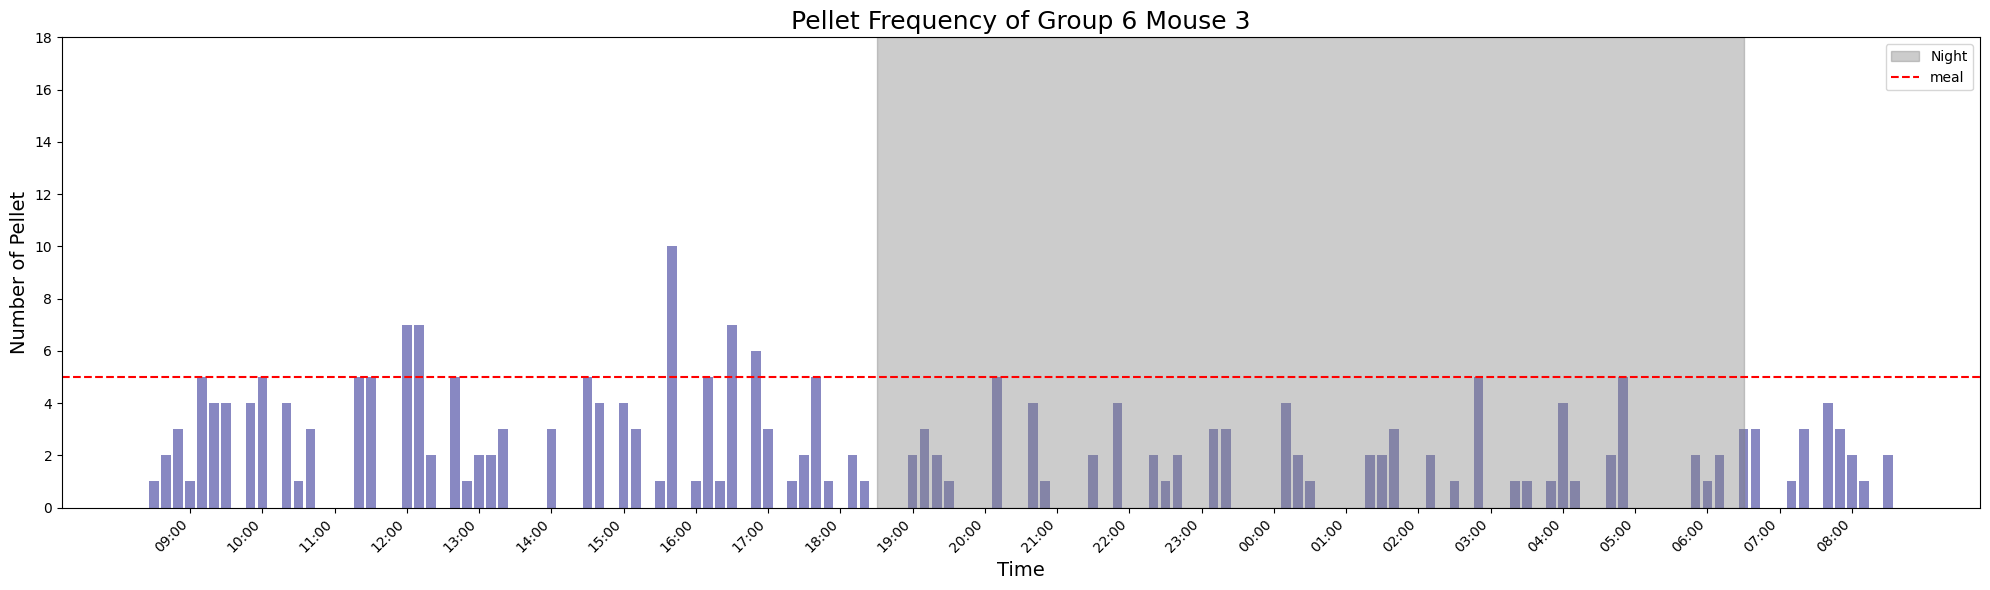

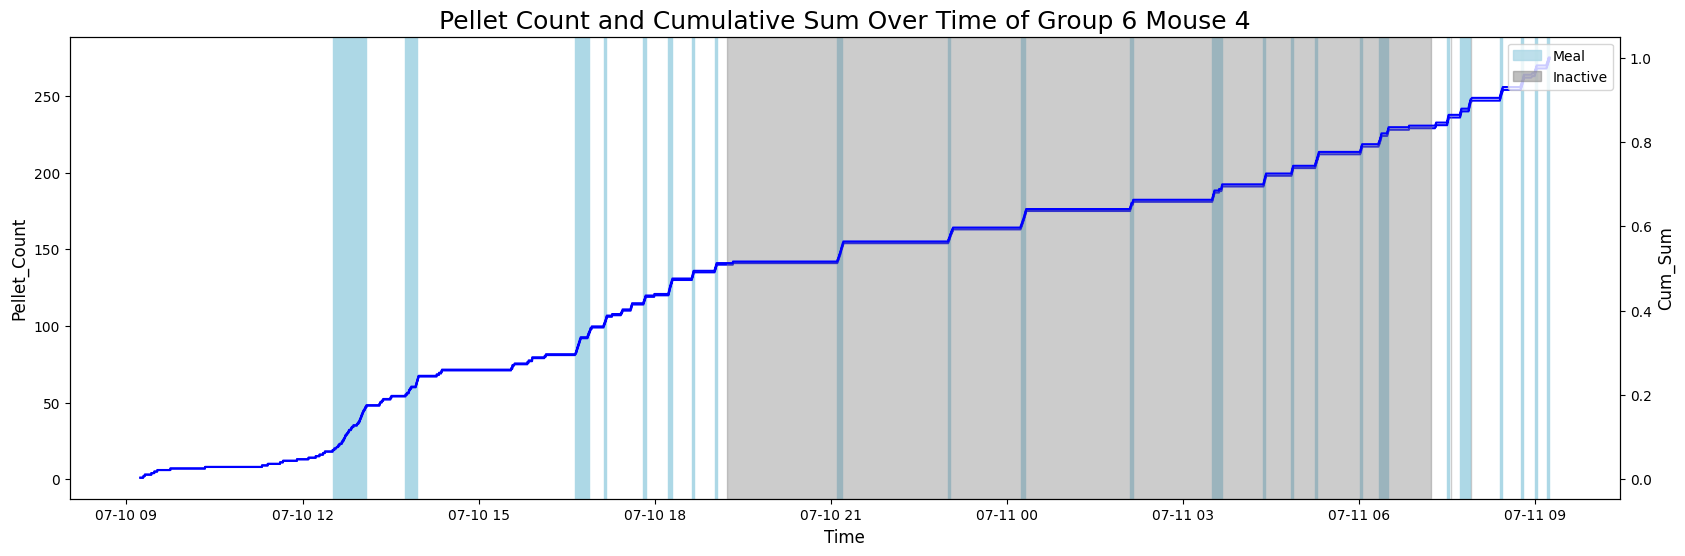

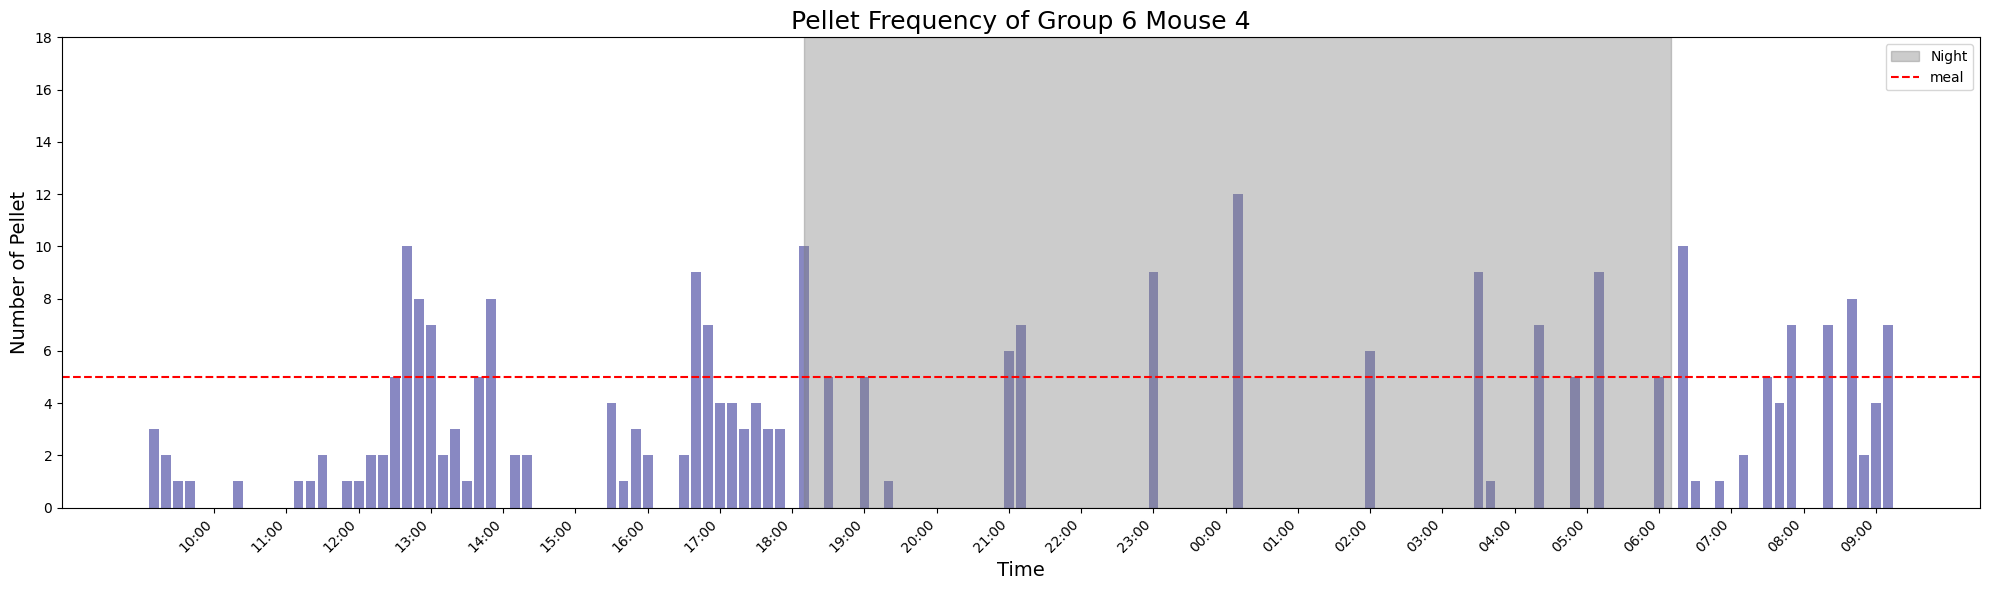

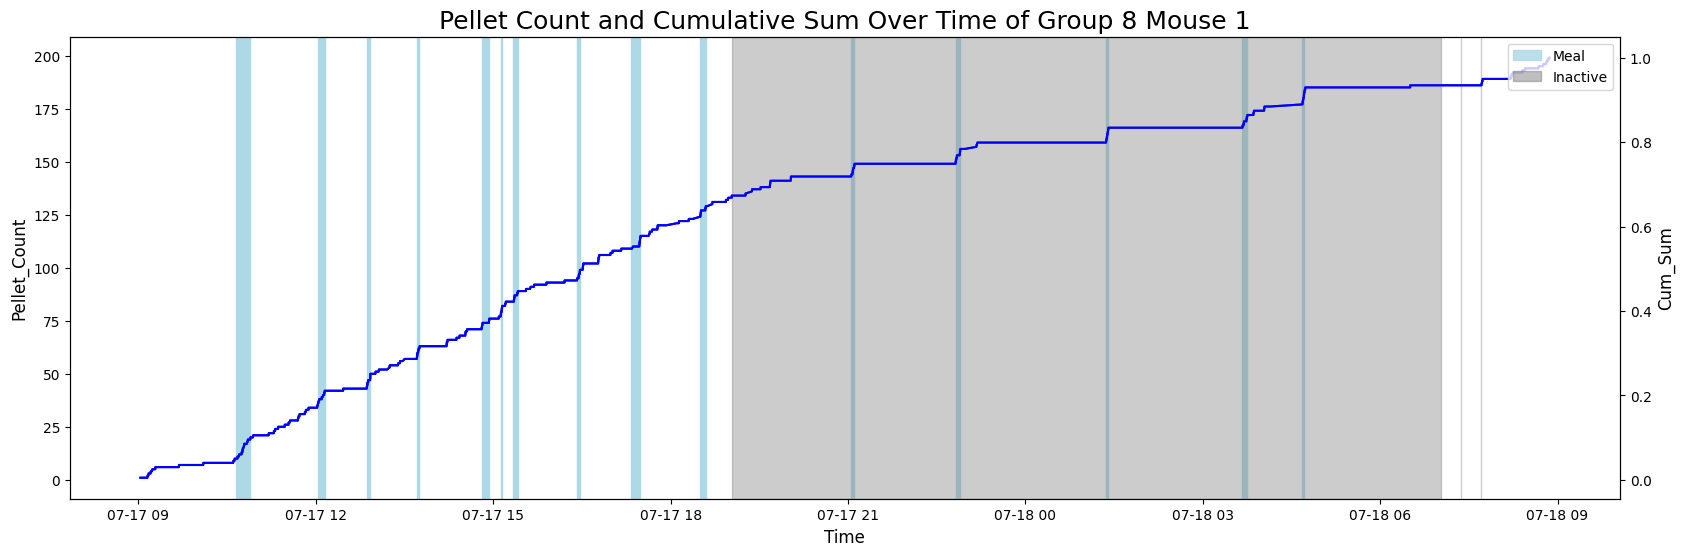

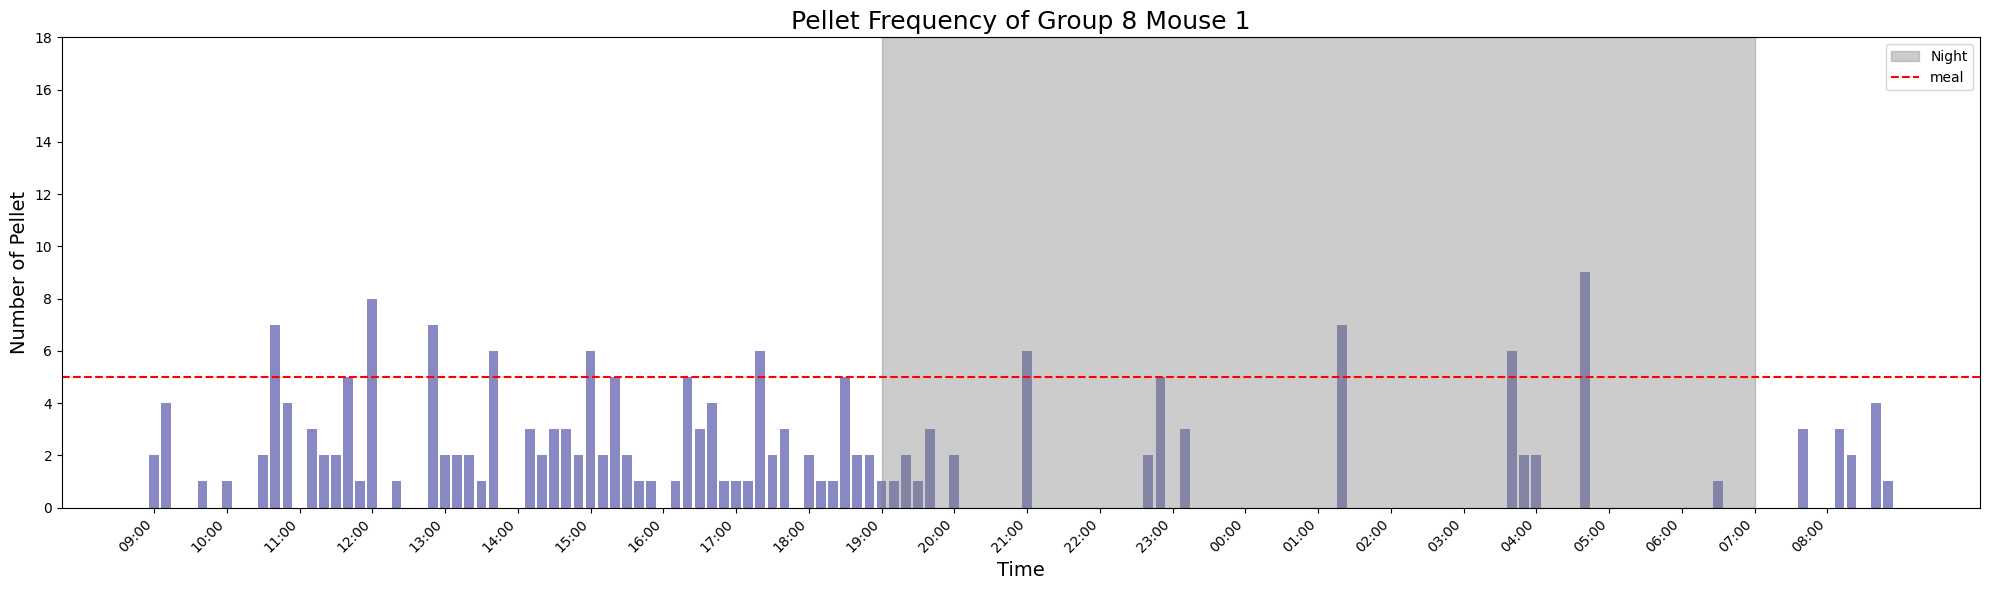

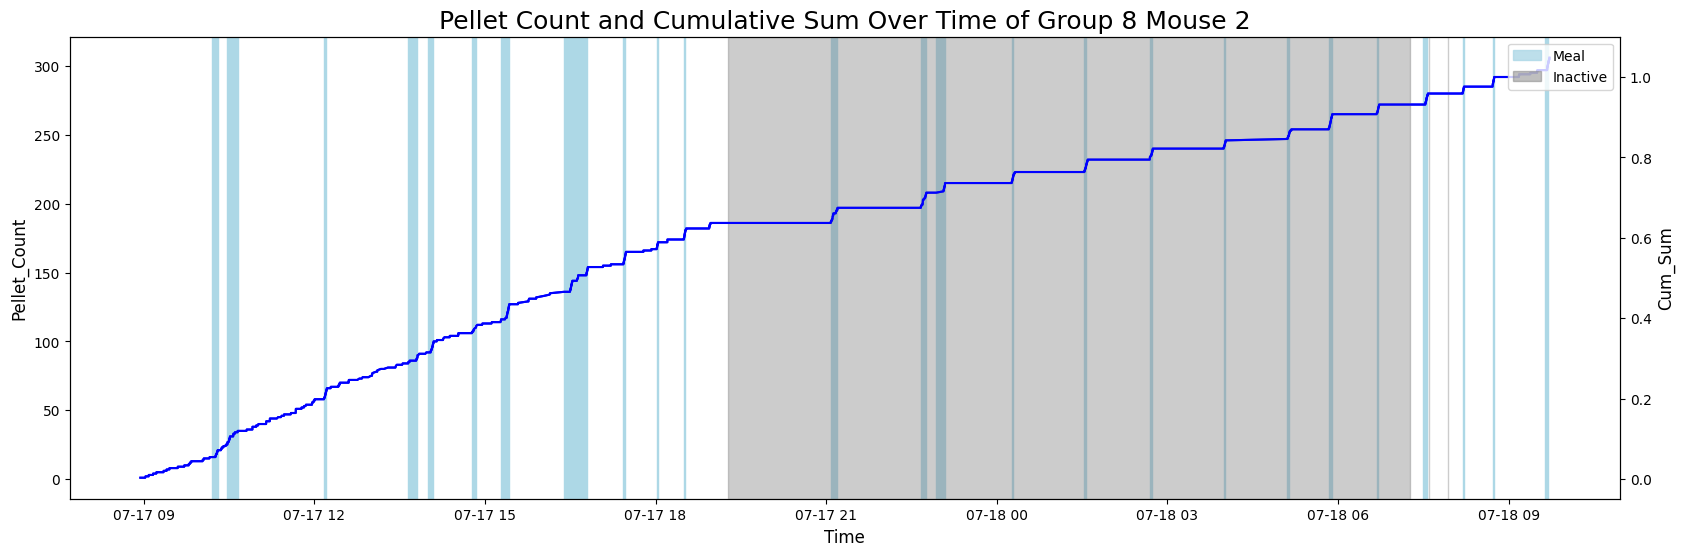

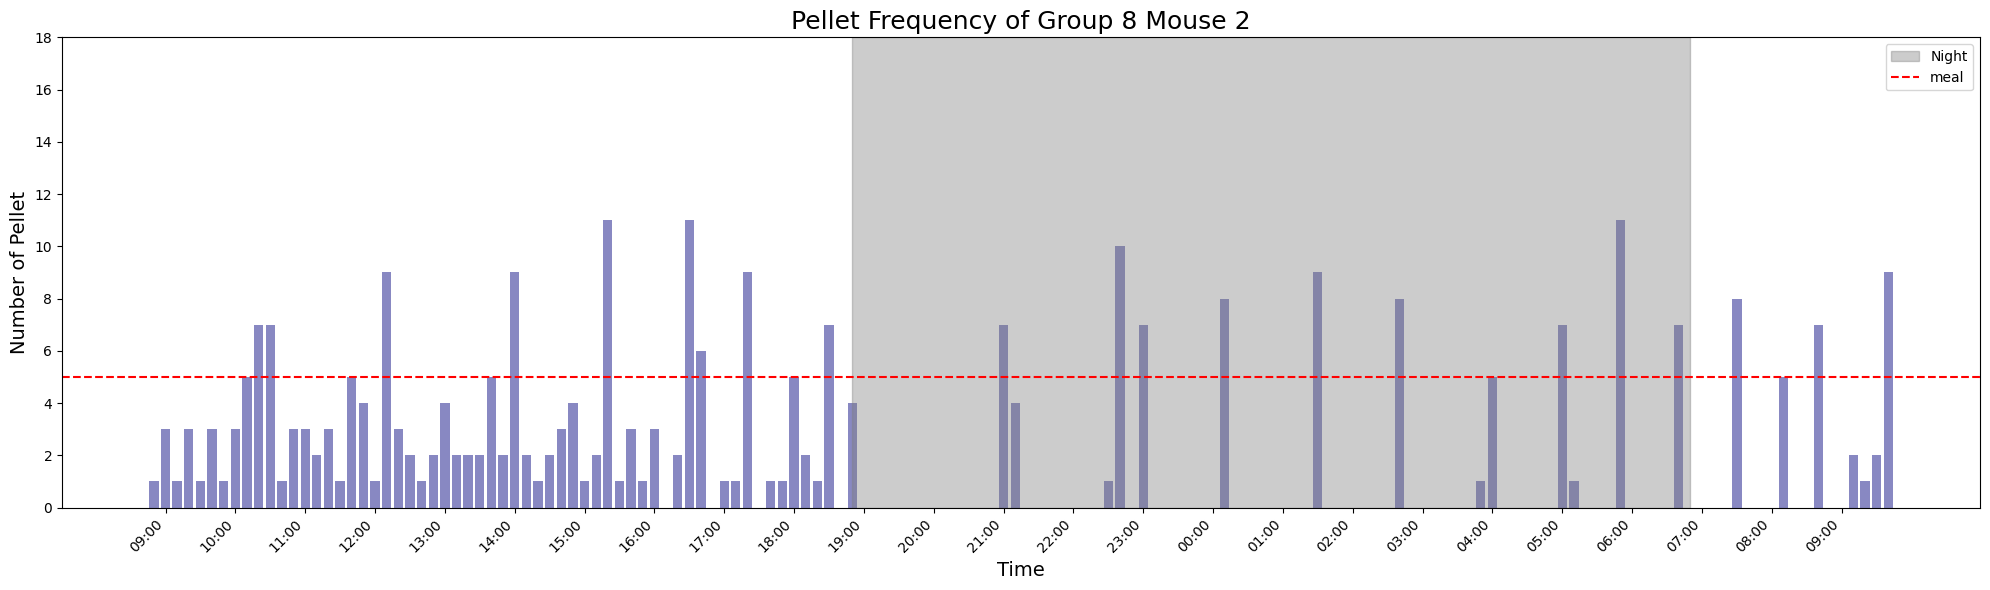

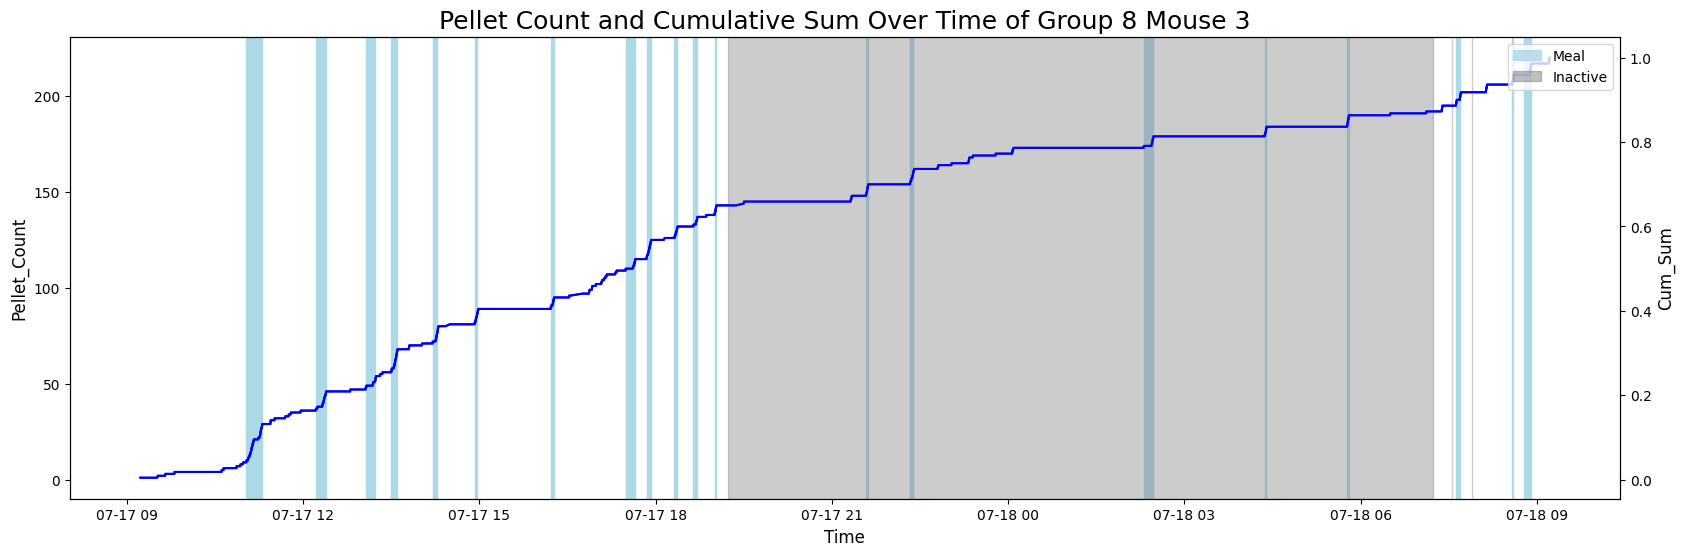

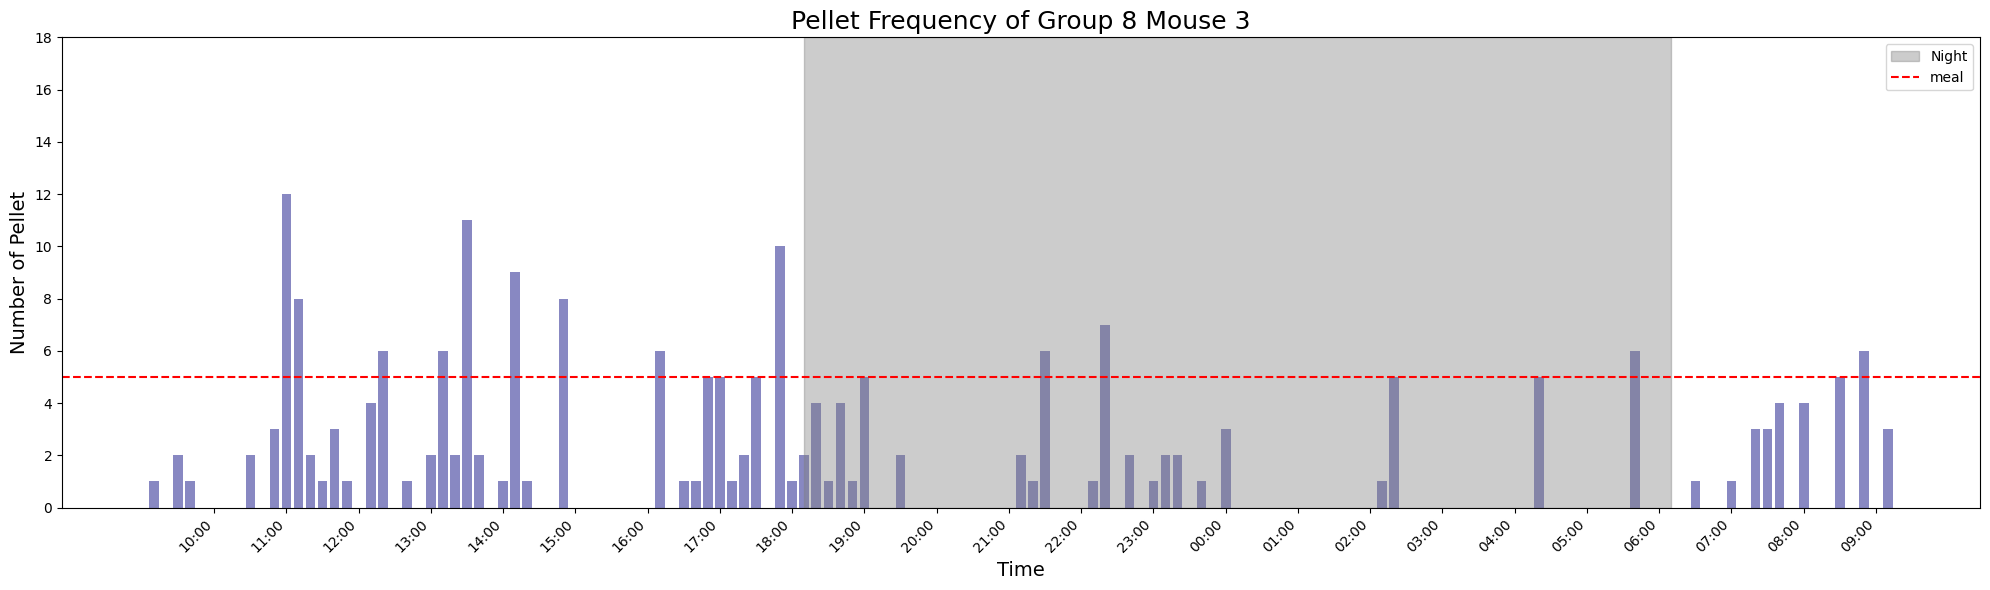

In [4]:
for sheet in paths.fr1_cask_sheet:
    data = read_excel_by_sheet(sheet, path)
    meal = ml.find_meals(data)
    group = ml.find_pellet_frequency(data)
    bhv, num = tl.get_bhv_num(sheet)
    ml.graphing_cum_count(data, meal, bhv, num)
    ml.graph_pellet_frequency(group, bhv, num)
    temp = ml.average_pellet(group)
    cask_pellet_avg.append(temp)
    avg = round(len(meal)/ml.experiment_duration(data), 2)
    fr1_cask_meal_count.append(avg)

In [5]:
print('Control Average Pellet:', ctrl_pellet_avg)
print('Cask Average Pellet:', cask_pellet_avg)
print('Average Meal Per day of Control Group:', fr1_ctrl_meal_count)
print('Average Meal Per day of Cask Group:', fr1_cask_meal_count)

Control Average Pellet: [9.842, 8.601, 8.844, 8.892, 10.196, 9.483, 9.483, 9.441, 9.357, 9.465, 9.959]
Cask Average Pellet: [8.471, 8.098, 7.552, 10.5, 8.723, 8.979, 10.0, 11.458, 8.35, 12.322, 9.167]
Average Meal Per day of Control Group: [23.75, 25.11, 19.19, 23.81, 28.23, 26.27, 26.36, 23.12, 23.01, 22.36, 24.49]
Average Meal Per day of Cask Group: [22.02, 20.19, 20.14, 24.03, 23.29, 18.01, 24.05, 37.98, 16.11, 31.0, 26.01]


In [7]:
invs.perform_T_test(fr1_ctrl_meal_count, fr1_cask_meal_count, test_side='greater')

P Value is  0.5513707332197095
There is no significant difference between the two groups.


In [9]:
invs.perform_T_test(ctrl_pellet_avg, cask_pellet_avg)

P Value is  0.9913431939384856
There is no significant difference between the two groups.


### Graph Average Pellet

Control Size: 11
CASK Size: 11
Control Average: 9.414818181818184
CASK Average: 9.42
Control Standard Deviation: 0.4864339252523035
CASK Standard Deviation: 1.4867668277171104


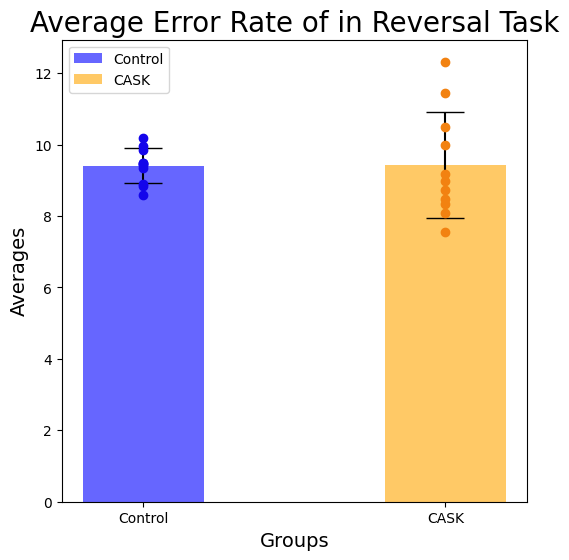

In [8]:
ml.graph_average_pellet(ctrl_pellet_avg, cask_pellet_avg, exp_name='CASK')

* Pellet Intervals of cask group and control group has generally no significant difference
* Experimental groups has larger variance among their average pellet intervals